<a href="https://colab.research.google.com/github/OmerRosen/Kaggle/blob/main/IMDB_2022_Hit_or_Flop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB 2022 - Hit or Flop

## Mission Statement

### Data To Collect

#### Search box page:
* Movie Id
* Movie Title
* Movie year
* Rating
* MetaScore - Outcome
* Description
* Poster
* Directore name + Link
* Stars
* Votes - Output
* Genre

#### Main Movie Page data
* Movie Length
* Rank
* Writer
* Star #1
* Star #2
* Star #3
* User eviews
* Critic reviews
* Number of photos posted
* Storyline - Text
* Tag line
* Release Date - Month
* Country of origin
* Additional Lanaguages
* Country of filming
* Production companies
* Budget
* Opening Weekend Date
* Gross US & Canada - Output
* Opening weekend US & Canada - Output
* Gross worldwide - Output
* Color - Color
* Color - Black&White
* Sound mix - Dolby Digital
* Sound mix - Dolby Atmos
* Aspect ratio

#### Director Page:
* Director Age
* Is Top 500?
* Director Gender (Based on bio)
* Previous film count - As Director
* Previous film count - As Writer
* Previous film count - As As Producer
* Director Publicity listing count

#### Information Abount Cast:
* Full list of cast and their profile links
* Number of cast members
* Produced by - Is top 500?
* Music by - Is top 500?
* Cinematography by  - Is top 500
* Film Editing by   - Is top 500
* Art Direction by  - Is top 500
* Number of Production Management
* Number of Art Department
* Number of Sound Department
* Number of Camera and Electrical Department
* Number of Editorial Department
* Number of Music Department
* Number of Additional Crew

#### Actor Page
* Is Top 5000?
* Is Top 500?
* Is Top 100 (aka - Has numberical rank)
* Is Top 10 (aka - Has numberical rank)
* Numerical Rank (Could be none)
* Gender
* Age
* Oscar nominations 
* Birth country

#### Aggragated data:
* How many male stars
* How many female stars
* Avrage cast memeber age
* Max/Min age of cast member
* Number of unique birth countries of actors
* Total number of Oscar numinatior for cast
* Num cast members in top 5000
* Num cast memebers in top 500
* Num cast members in top 100
* Num cast members in top 10

# IMDB Scraper

## Import Libraries

In [1]:
import requests
from IPython.core.display import HTML
import json
from time import sleep
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import traceback


## Set main variables

In [2]:
base_url = "https://www.imdb.com"
base_folder_path = "/content/drive/My Drive/Harvard HW/Course 4 - Final Project"

start_date = "2022-01-01"
end_date = "2022-12-31"
minimum_votes = 10 # Minimum vote amount to coolect movie
start_point = 1 # Start from movie #1-50

movie_search_url = f"{base_url}/search/title/?title_type=feature&release_date={start_date},{end_date}&num_votes={minimum_votes},&{start_point}anguages=en&start=1&ref_=adv_nxt"
movie_search_url

'https://www.imdb.com/search/title/?title_type=feature&release_date=2022-01-01,2022-12-31&num_votes=10,&1anguages=en&start=1&ref_=adv_nxt'

In [3]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
}

list_of_50_movies = requests.get(f'{movie_search_url}', headers=headers, timeout=10)
list_of_50_movies

<Response [200]>

In [4]:
list_of_50_movies_soup = BeautifulSoup(list_of_50_movies.text, 'html.parser').find_all('div',{'class':'lister-item mode-advanced'})


In [5]:
movie_search_page = list_of_50_movies_soup[0]

## Function: Get Movie Box details

In [6]:
def get_basic_details(movie_search_page):
  search_box_info = {}
  search_box_info['movie_name'] = movie_search_page.find('a')
  search_box_info['movie_page_url'] = f"{base_url}{movie_search_page.find('a')['href']}"

  try:
    search_box_info['movie_place'] = None if not movie_search_page.find('span',{'class':'lister-item-index unbold text-primary'}) else movie_search_page.find('span',{'class':'lister-item-index unbold text-primary'}).text.replace('.','')
    search_box_info['movie_id'] = None if not search_box_info['movie_page_url'] else search_box_info['movie_page_url'].split('/')[-2]
    search_box_info['movie_name'] = None if not movie_search_page.find('a').find('img') else movie_search_page.find('a').find('img')['alt'].strip()
    search_box_info['movie_thubmnail'] = None if not movie_search_page.find('a').find('img') else movie_search_page.find('a').find('img')['src']
    search_box_info['movie_metascore'] = None if not movie_search_page.find('span', {'class': 'metascore'}) else movie_search_page.find('span', {'class': 'metascore'}).text.strip()
    search_box_info['movie_description'] = None if not movie_search_page.find_all('p',{'class':'text-muted'}) else movie_search_page.find_all('p',{'class':'text-muted'})[1].text.strip()
    search_box_info['runtime_min'] = None if not movie_search_page.find('span',{'class':'runtime'}) else movie_search_page.find('span',{'class':'runtime'}).text.split(' ')[0]

    bottom_box_info = movie_search_page.find('p',{'class':'sort-num_votes-visible'}).find_all('span')
    search_box_info['movie_vote_num'] = bottom_box_info[1]['data-value']

    search_box_info['movie_rating'] = None if not movie_search_page.find_all('p',{'class':'text-muted'})[0].find('span',{'class':'certificate'}) else movie_search_page.find_all('p',{'class':'text-muted'})[0].find('span',{'class':'certificate'}).text.strip()
    search_box_info['movie_genere'] = None if not movie_search_page.find_all('p',{'class':'text-muted'})[0].find('span',{'class':'genre'}) else movie_search_page.find_all('p',{'class':'text-muted'})[0].find('span',{'class':'genre'}).text.strip()

    search_box_info['__SuccsefullyCollectBasicDetails'] = True;

  except Exception as e:
    print(f"Failed extracting data for movie: {search_box_info['movie_name']}. \nUrl: {search_box_info['movie_page_url']}.\n Error:\n{e}")
    traceback.print_exc()
    search_box_info['__SuccsefullyCollectBasicDetails'] = False;


  return search_box_info

In [7]:
movie_search_page = list_of_50_movies_soup[1]
search_box_info = get_basic_details(movie_search_page)
search_box_info



{'movie_name': 'Everything Everywhere All at Once',
 'movie_page_url': 'https://www.imdb.com/title/tt6710474/?ref_=adv_li_i',
 'movie_place': '2',
 'movie_id': 'tt6710474',
 'movie_thubmnail': 'https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png',
 'movie_metascore': '81',
 'movie_description': 'A middle-aged Chinese immigrant is swept up into an insane adventure in which she alone can save existence by exploring other universes and connecting with the lives she could have led.',
 'runtime_min': '139',
 'movie_vote_num': '428913',
 'movie_rating': 'R',
 'movie_genere': 'Action, Adventure, Comedy',
 '__SuccsefullyCollectBasicDetails': True}

In [8]:
example_movie_url = "https://www.imdb.com/title/tt14174168/?ref_=adv_li_i"#search_box_info['movie_page_url']
movie_main_page = requests.get(search_box_info['movie_page_url'], headers=headers)
movie_main_page_soup = BeautifulSoup(movie_main_page.text, 'html.parser')

## Function: Extract Movie Artists

In [9]:
def extract_artist(artist_type, movie_main_page_soup):

  item_dict = {}

  search_result = movie_main_page_soup.find(string=f"{artist_type}s") if movie_main_page_soup.find(string=artist_type) is None else movie_main_page_soup.find(string=artist_type)
  search_item_list = []
  if search_result!=None:
    search_item_list = search_result.find_parent().find_next_sibling().find_all('a')
  
  item_dict[f"{artist_type}_count"] = len(search_item_list)

  for i,item in enumerate(search_item_list):
    artisc_name = item.text.strip()
    artisc_url = item['href']
    artist_id = artisc_url.split('/')[2]
    item_dict[f"{artist_type}_{i+1}_name"] = artisc_name
    #item_dict[f"{artist_type}_{i+1}_url"] = artisc_url
    item_dict[f"{artist_type}_{i+1}_imdb_id"] = artist_id

  return item_dict

print(extract_artist("Director", movie_main_page_soup))
print(extract_artist("Writer", movie_main_page_soup))
print(extract_artist("Star", movie_main_page_soup))

{'Director_count': 2, 'Director_1_name': 'Daniel Kwan', 'Director_1_imdb_id': 'nm3453283', 'Director_2_name': 'Daniel Scheinert', 'Director_2_imdb_id': 'nm3215397'}
{'Writer_count': 2, 'Writer_1_name': 'Daniel Kwan', 'Writer_1_imdb_id': 'nm3453283', 'Writer_2_name': 'Daniel Scheinert', 'Writer_2_imdb_id': 'nm3215397'}
{'Star_count': 3, 'Star_1_name': 'Michelle Yeoh', 'Star_1_imdb_id': 'nm0000706', 'Star_2_name': 'Stephanie Hsu', 'Star_2_imdb_id': 'nm3513533', 'Star_3_name': 'Jamie Lee Curtis', 'Star_3_imdb_id': 'nm0000130'}


## Function: Perform Currency Conversion

In [10]:
currency_codes = {
    "$":"USD",
    "€":"EUR",
    "£":"GBP",
    "₹":"INR",
    "â‚¬": "EUR",
    "â‚¹": "INR",
    "CA$": "CAD",
    "NOKÂ": "NOK",
    "Â£": "GBP",
    "CHF": "CHF",
    "Â¥": "JPY",
    "PKR": "PKR",
    "A$": "AUD",
    "CZK": "CZK",
    "RUR": "RUB",
    "NZ$": "NZD",
    "MYR": "MYR",
    "NGN": "NGN",
    "NOK":"NOK",
    "A$":"AUD",
    "â‚¬":"EUR",
    "â‚¹":"INR",
    "Â£":"GBP",
    "CA$":"CAD",
    "CHFÂ ":"CHF",
    "MYRÂ ":"MYR",
    "NGNÂ ":"NGN",
    "NOKÂ ":"NOK",
    "NZ$":"NZD",
    "PKRÂ ":"PKR",
    "RURÂ ":"RUB",
    "IRR ":"IRR"
}


currency_conversion_values = {}


In [11]:
def extract_currency_symbol(s):
    match = re.search(r"[^\d]+", s)
    if match:
        return match.group(0).strip()
    else:
        return ""

In [12]:
def get_currency_code(amount_string):
  currency_symbol = extract_currency_symbol(amount_string)
  if currency_symbol in currency_codes:
      return currency_codes[currency_symbol]
  else:
    print(f"Could not find a value for: {currency_symbol} in {amount_string}")
    return None

In [13]:
def extract_numerical_value(string):
    # Remove all non-numeric characters from the string
    numerical_string = re.sub(r"[^\d.]+", "", string)
    # Convert the string to a float and return it
    return float(numerical_string)

In [14]:

with open(f'{base_folder_path}/openexchangerates.txt', 'r') as f:
    api_key = f.read().strip()

api_key

def convert_string_amount_to_usd(amount):

  # get the currency code and amount value
  currency_code = get_currency_code(amount)
  original_amount = extract_numerical_value(amount)
  usd_amount = None

  if currency_code==None:
    usd_amount=None
  elif currency_code!="USD":
  
    if currency_code in currency_conversion_values:
      exchange_rate = currency_conversion_values[currency_code]
    else:
      # make API request to get exchange rate for the currency code
      url = f"https://openexchangerates.org/api/latest.json?app_id={api_key}&symbols={currency_code}"
      print(amount,currency_code,original_amount,url)
      response = requests.get(url)
      print(response)
      # parse the exchange rate from the API response
      exchange_rate = response.json()["rates"][currency_code]
      
      currency_conversion_values[currency_code] = exchange_rate
      
      # calculate the USD equivalent amount
      usd_amount = round(original_amount / exchange_rate)
      
      print(f"{amount} {currency_code} = {usd_amount} USD")
  else:
    usd_amount = original_amount

  return usd_amount,original_amount,currency_code



convert_string_amount_to_usd("CA$15,000")
convert_string_amount_to_usd("NOKÂ 80,200,000")
convert_string_amount_to_usd("NOKÂ 20,000,000")
convert_string_amount_to_usd("â‚¹3,500,000,000")
currency_conversion_values

CA$15,000 CAD 15000.0 https://openexchangerates.org/api/latest.json?app_id=ac63294868f6455a91a128e22f4d9f35&symbols=CAD
<Response [200]>
CA$15,000 CAD = 11147 USD
NOKÂ 80,200,000 NOK 80200000.0 https://openexchangerates.org/api/latest.json?app_id=ac63294868f6455a91a128e22f4d9f35&symbols=NOK
<Response [200]>
NOKÂ 80,200,000 NOK = 7576647 USD
â‚¹3,500,000,000 INR 3500000000.0 https://openexchangerates.org/api/latest.json?app_id=ac63294868f6455a91a128e22f4d9f35&symbols=INR
<Response [200]>
â‚¹3,500,000,000 INR = 42523492 USD


{'CAD': 1.345645, 'NOK': 10.585157, 'INR': 82.307445}

## Function: Get Movie Cast List and count

In [15]:
def get_cast_list(cast_page_url):

  cast_counts = {'cast_count_total':0}

  cast_page = requests.get(cast_page_url, headers=headers)
  cast_page_soup = BeautifulSoup(cast_page.text, 'html.parser')   

  cast_groups = cast_page_soup.find_all('h4')

  for cast_group in cast_groups:
    try:
      group_name = cast_group['id']
      #print(group_name)
      group_list = cast_group.find_next_sibling()
      group_count = 0
      if group_list is not None:
        group_list = group_list.findAll('tr')
        group_count = len(group_list)
      cast_counts[f"cast_count_{group_name}"] = group_count
      cast_counts['cast_count_total'] += group_count
    except Exception as ex:
      pass
  return cast_counts

get_cast_list("https://www.imdb.com/title/tt18375618/fullcredits")

{'cast_count_total': 13,
 'cast_count_director': 1,
 'cast_count_writer': 1,
 'cast_count_cast': 6,
 'cast_count_producer': 2,
 'cast_count_cinematographer': 1,
 'cast_count_editor': 1,
 'cast_count_location_management': 1}

## Function: Get Movie Page Extanded Details

In [16]:
def get_extended_datails(movie_page_url, movie_name):
  movie_page_dict = {}

  try:

    movie_main_page = requests.get(movie_page_url, headers=headers)
    movie_main_page_soup = BeautifulSoup(movie_main_page.text, 'html.parser')   

    year_rating = movie_main_page_soup.find('ul',{"class":"ipc-inline-list ipc-inline-list--show-dividers sc-afe43def-4 kdXikI baseAlt"}).find_all('a')

    movie_page_dict['movie_year'] = year_rating[0].text if len(year_rating)>0 else None
    movie_page_dict['movie_rating'] = year_rating[1].text if len(year_rating)>1 else None

    director_dict = extract_artist("Director", movie_main_page_soup)
    if director_dict[f"Director_count"] == 0:
      print(f"No Director found for movie {movie_name}. Url: {movie_page_url}")
    movie_page_dict.update(director_dict)

    writer_dict = extract_artist("Writer", movie_main_page_soup)
    if writer_dict[f"Writer_count"] == 0:
      print(f"No Writer found for movie {movie_name}. Url: {movie_page_url}")
    movie_page_dict.update(writer_dict)

    star_dict = extract_artist("Star", movie_main_page_soup)
    if star_dict[f"Star_count"] == 0:
      print(f"No Star found for movie {movie_name}. Url: {movie_page_url}")
    movie_page_dict.update(star_dict)

    review_scores = movie_main_page_soup.find_all('span',{'class':'score'})
    movie_page_dict['user_reviews_count'] = review_scores[0].text if len(review_scores)>0 else None
    movie_page_dict['critic_reviews_count'] = review_scores[1].text if len(review_scores)>1 else None

    movie_page_dict['release_date'] = movie_main_page_soup.find('a',{'class':'ipc-metadata-list-item__label ipc-metadata-list-item__label--link'}, string="Release date").find_parent().find('a',{'class':'ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link'}).text.split('(')[0].strip()
    movie_page_dict['release_date']

    movie_page_dict['budget'] = movie_main_page_soup.find('span',{'class':'ipc-metadata-list-item__label'}, string="Budget")
    if (movie_page_dict['budget']!=None):
      movie_page_dict['budget'] = movie_page_dict['budget'].find_next_sibling().find('span',{'class':'ipc-metadata-list-item__list-content-item'}).text.split('(')[0].strip()

      usd_amount,original_amount,currency_code = convert_string_amount_to_usd(movie_page_dict['budget'])
      movie_page_dict['budget_usd'] = usd_amount
      movie_page_dict['budget_currency'] = currency_code

    movie_page_dict['gross_worldwide'] = movie_main_page_soup.find('span',{'class':'ipc-metadata-list-item__label'}, string="Gross worldwide")
    if (movie_page_dict['gross_worldwide']!=None):
      movie_page_dict['gross_worldwide'] = movie_page_dict['gross_worldwide'].find_next_sibling().find('span',{'class':'ipc-metadata-list-item__list-content-item'}).text.split('(')[0].strip()
      movie_page_dict['gross_worldwide'], _, _ = convert_string_amount_to_usd(movie_page_dict['gross_worldwide'])

    movie_page_dict['gross_us_canada'] = movie_main_page_soup.find('span',{'class':'ipc-metadata-list-item__label'}, string="Gross US & Canada")
    if (movie_page_dict['gross_us_canada']!=None):
      movie_page_dict['gross_us_canada'] = movie_page_dict['gross_us_canada'].find_next_sibling().find('span',{'class':'ipc-metadata-list-item__list-content-item'}).text.split('(')[0].strip()
      movie_page_dict['gross_us_canada'], _, _ = convert_string_amount_to_usd(movie_page_dict['gross_us_canada'])

    movie_page_dict['opening_weekend_us_canada'] = movie_main_page_soup.find('span',{'class':'ipc-metadata-list-item__label'}, string="Opening weekend US & Canada")
    if (movie_page_dict['opening_weekend_us_canada']!=None):
      movie_page_dict['opening_weekend_us_canada'] = movie_page_dict['opening_weekend_us_canada'].find_next_sibling().find('span',{'class':'ipc-metadata-list-item__list-content-item'}).text.split('(')[0].strip()
      movie_page_dict['opening_weekend_us_canada'], _, _ = convert_string_amount_to_usd(movie_page_dict['opening_weekend_us_canada'])

    movie_page_dict['origin_country'] = movie_main_page_soup.find('span',{'class':'ipc-metadata-list-item__label'}, string="Country of origin")
    if (movie_page_dict['origin_country']!=None):
      movie_page_dict['origin_country'] = movie_page_dict['origin_country'].find_next_sibling().find('a').text.split('(')[0].strip()

    languages = movie_main_page_soup.find('span',string="Language") if movie_main_page_soup.find('span',string="Languages") is None else movie_main_page_soup.find('span',string="Languages")
    languages = [] if not languages else languages.find_next_sibling().find_all('a')
    movie_page_dict['languages'] = ",".join([language.text for language in languages])

    movie_page_dict['__SuccsefullyCollectExtandedDetails'] = True;

    ## Collect cast count for movie:
    movie_id = movie_page_url.split('/')[-2]
    cast_page_url = f"https://www.imdb.com/title/{movie_id}/fullcredits"
    cast_list = get_cast_list(cast_page_url)
    movie_page_dict.update(cast_list)

  except Exception as e:
    print(f"Failed extracting data for movie: {movie_name}. \nUrl: {movie_page_url}.\n Error:\n{e}")
    traceback.print_exc()
    movie_page_dict['__SuccsefullyCollectExtandedDetails'] = False;

  return movie_page_dict


get_extended_datails(search_box_info['movie_page_url'],search_box_info['movie_name'])

{'movie_year': '2022',
 'movie_rating': 'R',
 'Director_count': 2,
 'Director_1_name': 'Daniel Kwan',
 'Director_1_imdb_id': 'nm3453283',
 'Director_2_name': 'Daniel Scheinert',
 'Director_2_imdb_id': 'nm3215397',
 'Writer_count': 2,
 'Writer_1_name': 'Daniel Kwan',
 'Writer_1_imdb_id': 'nm3453283',
 'Writer_2_name': 'Daniel Scheinert',
 'Writer_2_imdb_id': 'nm3215397',
 'Star_count': 3,
 'Star_1_name': 'Michelle Yeoh',
 'Star_1_imdb_id': 'nm0000706',
 'Star_2_name': 'Stephanie Hsu',
 'Star_2_imdb_id': 'nm3513533',
 'Star_3_name': 'Jamie Lee Curtis',
 'Star_3_imdb_id': 'nm0000130',
 'user_reviews_count': '3.4K',
 'critic_reviews_count': '410',
 'release_date': 'April 8, 2022',
 'budget': '$14,300,000',
 'budget_usd': 14300000.0,
 'budget_currency': 'USD',
 'gross_worldwide': 139708004.0,
 'gross_us_canada': 77169469.0,
 'opening_weekend_us_canada': 501305.0,
 'origin_country': 'United States',
 'languages': 'English,Mandarin,Cantonese',
 '__SuccsefullyCollectExtandedDetails': True,
 'c

In [17]:
# print(search_box_info['movie_page_url'],search_box_info['movie_name'])
# cast_url = movie_main_page_soup.find('a',{'class':'ipc-metadata-list-item__label ipc-metadata-list-item__label--link'})['href']
# cast_url = f"{base_url}{cast_url}"
# cast_url

In [18]:
# Dynamic parameters:

def get_50_movie_batch(start_point, minimum_votes = 20, start_date = "2022-01-01", end_date = "2022-12-31"):
  movie_search_url_50_batch = f"{base_url}/search/title/?title_type=feature&release_date={start_date},{end_date}&num_votes={minimum_votes},&user_rating=1.0,10.0&countries=us&languages=en&start={start_point}&ref_=adv_nxt"
  #print(f"Start point: {start_point}. search url: {movie_search_url_50_batch}")
  search_page = requests.get(f'{movie_search_url_50_batch}', headers=headers, timeout=10)
  search_page_soup = BeautifulSoup(search_page.text, 'html.parser')
  list_of_50_movies_soup = search_page_soup.find_all('div',{'class':'lister-item mode-advanced'})

  max_num_of_results = search_page_soup.find('div',{'class':'desc'}).find('span').text.split(' ')[2].replace(",", "")
  max_num_of_results = int(max_num_of_results)

  #print(f"max_num_of_results: {max_num_of_results}")
  return(list_of_50_movies_soup,max_num_of_results)

list_of_50_movies_soup,max_num_of_results = get_50_movie_batch(start_point = 1, minimum_votes = 20, start_date = "2022-01-01", end_date = "2022-12-31")

In [19]:
# Fixed parameters:
base_url = "https://www.imdb.com"

start_date = "2022-01-01"
end_date = "2022-12-31"
minimum_votes = 20 # Minimum vote amount to coolect movie

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"}

In [20]:
movie_dataset_path = "/content/drive/My Drive/Harvard HW/Course 4 - Final Project/total_movie_dataset.csv"
if os.path.exists(movie_dataset_path):
  movie_df = pd.read_csv(movie_dataset_path)
  total_movie_dataset = movie_df.set_index('movie_id').T.to_dict()
  
else:
  total_movie_dataset = {}
  movie_df = pd.DataFrame(total_movie_dataset)

print(f"total_movie_dataset contains {len(total_movie_dataset)} records")
movie_df.head(3)

total_movie_dataset contains 1406 records


movie_id  __SuccsefullyCollectBasicDetails  \
0   tt1630029                              True   
1   tt6710474                              True   
2  tt13833688                              True   

   __SuccsefullyCollectExtandedDetails                         movie_name  \
0                                 True           Avatar: The Way of Water   
1                                 True  Everything Everywhere All at Once   
2                                 True                          The Whale   

                                      movie_page_url movie_place  movie_id.1  \
0  https://www.imdb.com/title/tt1630029/?ref_=adv...           1   tt1630029   
1  https://www.imdb.com/title/tt6710474/?ref_=adv...           2   tt6710474   
2  https://www.imdb.com/title/tt13833688/?ref_=ad...           3  tt13833688   

                                     movie_thubmnail  movie_metascore  \
0  https://m.media-amazon.com/images/S/sash/4Fyxw...             67.0   
1  https://m.media-amazon.com/images/S/sash/4Fyxw...             81.0   
2  https://m.media-amazon.com/images/S/sash/4Fyxw...             60.0   

                                   movie_description  ...  \
0  Jake Sully lives with his newfound family form...  ...   
1  A middle-aged Chinese immigrant is swept up in...  ...   
2  A reclusive, morbidly obese English teacher at...  ...   

   cast_count_miscellaneous  cast_count_thanks   Director_2_name  \
0                     138.0                6.0               NaN   
1                     104.0               58.0  Daniel Scheinert   
2                      30.0                NaN               NaN   

  Director_2_imdb_id Director_3_name  Director_3_imdb_id movie_id.2  \
0                NaN             NaN                 NaN        NaN   
1          nm3215397             NaN                 NaN        NaN   
2                NaN             NaN                 NaN        NaN   

  movie_id.3  movie_id.4 movie_id.5  
0        NaN         NaN        NaN  
1        NaN         NaN        NaN  
2        NaN         NaN        NaN  

[3 rows x 83 columns]

## Cursor: Collecting movies from IMDB

In [21]:
start_point = 1 # Start from movie #1-50

basic_data_collected = 0
basic_data_skipped = 0
extended_data_collected = 0
extended_data_skipped = 0

count = 1
while start_point < max_num_of_results-50:

  list_of_50_movies_soup,_ = get_50_movie_batch(start_point = start_point, minimum_votes = 20, start_date = "2022-01-01", end_date = "2022-12-31")

  for i,movie in enumerate(list_of_50_movies_soup):
    movie_data = {'__SuccsefullyCollectBasicDetails':False, '__SuccsefullyCollectExtandedDetails':False}

    basic_data = get_basic_details(movie)
    movie_id = basic_data['movie_id']

    try:
      if movie_id in total_movie_dataset.keys():
        movie_data = total_movie_dataset[movie_id]

      if movie_data['__SuccsefullyCollectBasicDetails']==True:
        basic_data_skipped += 1
      else:
        basic_data_collected += 1
        movie_data.update(basic_data)

      if movie_data['__SuccsefullyCollectExtandedDetails']==True:
        extended_data_skipped += 1
      else:
        extended_data_collected += 1
        extended_data = get_extended_datails(basic_data['movie_page_url'],basic_data['movie_name'])
        movie_data.update(extended_data)

        sleep(0.1)
    except Exception as e:
      print(f"Failed running cursor for movie: {movie_id}. \nUrl: {basic_data['movie_page_url']}.\n Error:\n{e}")
      traceback.print_exc()

    total_movie_dataset[movie_id] = movie_data
    count+= 1

    if (count%200 == 0):
      print(f"\nRun number: {count}. basic_data_collected: {basic_data_collected}. extended_data_collected: {extended_data_collected}. basic_data_skipped: {basic_data_skipped}. extended_data_skipped: {extended_data_skipped}")


  movie_dataset = pd.DataFrame(total_movie_dataset).T
  movie_dataset.to_csv(movie_dataset_path, index=True, index_label="movie_id")

  start_point += 50

print(f"\nRun number: {count}. \nbasic_data_collected: {basic_data_collected}. \nextended_data_collected: {extended_data_collected}. \nbasic_data_skipped: {basic_data_skipped}. \nextended_data_skipped: {extended_data_skipped}\n")


Run number: 200. basic_data_collected: 0. extended_data_collected: 0. basic_data_skipped: 199. extended_data_skipped: 199

Run number: 400. basic_data_collected: 0. extended_data_collected: 0. basic_data_skipped: 399. extended_data_skipped: 399
Failed extracting data for movie: Gasoline Alley. 
Url: https://www.imdb.com/title/tt14174168/?ref_=adv_li_i.
 Error:
'NoneType' object has no attribute 'find_all'


Traceback (most recent call last):
  File "<ipython-input-16-db9f6fddb3a8>", line 24, in get_extended_datails
    star_dict = extract_artist("Star", movie_main_page_soup)
  File "<ipython-input-9-5bc69bceb996>", line 8, in extract_artist
    search_item_list = search_result.find_parent().find_next_sibling().find_all('a')
AttributeError: 'NoneType' object has no attribute 'find_all'



Run number: 600. basic_data_collected: 0. extended_data_collected: 1. basic_data_skipped: 599. extended_data_skipped: 598

Run number: 800. basic_data_collected: 0. extended_data_collected: 1. basic_data_skipped: 799. extended_data_skipped: 798

Run number: 1000. basic_data_collected: 0. extended_data_collected: 1. basic_data_skipped: 999. extended_data_skipped: 998

Run number: 1200. basic_data_collected: 0. extended_data_collected: 1. basic_data_skipped: 1199. extended_data_skipped: 1198
Failed extracting data for movie: Deer Camp '86. 
Url: https://www.imdb.com/title/tt22184520/?ref_=adv_li_i.
 Error:
'NoneType' object has no attribute 'find_all'


Traceback (most recent call last):
  File "<ipython-input-16-db9f6fddb3a8>", line 24, in get_extended_datails
    star_dict = extract_artist("Star", movie_main_page_soup)
  File "<ipython-input-9-5bc69bceb996>", line 8, in extract_artist
    search_item_list = search_result.find_parent().find_next_sibling().find_all('a')
AttributeError: 'NoneType' object has no attribute 'find_all'


Failed extracting data for movie: IRL. 
Url: https://www.imdb.com/title/tt24107558/?ref_=adv_li_i.
 Error:
'NoneType' object has no attribute 'find_parent'

Run number: 1400. basic_data_collected: 0. extended_data_collected: 3. basic_data_skipped: 1399. extended_data_skipped: 1396


Traceback (most recent call last):
  File "<ipython-input-16-db9f6fddb3a8>", line 33, in get_extended_datails
    movie_page_dict['release_date'] = movie_main_page_soup.find('a',{'class':'ipc-metadata-list-item__label ipc-metadata-list-item__label--link'}, string="Release date").find_parent().find('a',{'class':'ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link'}).text.split('(')[0].strip()
AttributeError: 'NoneType' object has no attribute 'find_parent'



Run number: 1401. 
basic_data_collected: 0. 
extended_data_collected: 3. 
basic_data_skipped: 1400. 
extended_data_skipped: 1397



In [22]:
movie_dataset = pd.DataFrame(total_movie_dataset).T
movie_dataset.to_csv(movie_dataset_path, index=True, index_label="movie_id")

movie_dataset.head(5)

__SuccsefullyCollectBasicDetails  \
tt1630029                              True   
tt6710474                              True   
tt13833688                             True   
tt10640346                             True   
tt9764362                              True   

           __SuccsefullyCollectExtandedDetails  \
tt1630029                                 True   
tt6710474                                 True   
tt13833688                                True   
tt10640346                                True   
tt9764362                                 True   

                                   movie_name  \
tt1630029            Avatar: The Way of Water   
tt6710474   Everything Everywhere All at Once   
tt13833688                          The Whale   
tt10640346                            Babylon   
tt9764362                            The Menu   

                                               movie_page_url movie_place  \
tt1630029   https://www.imdb.com/title/tt1630029/?ref_=adv...           1   
tt6710474   https://www.imdb.com/title/tt6710474/?ref_=adv...           2   
tt13833688  https://www.imdb.com/title/tt13833688/?ref_=ad...           3   
tt10640346  https://www.imdb.com/title/tt10640346/?ref_=ad...           4   
tt9764362   https://www.imdb.com/title/tt9764362/?ref_=adv...           5   

            movie_id.1                                    movie_thubmnail  \
tt1630029    tt1630029  https://m.media-amazon.com/images/S/sash/4Fyxw...   
tt6710474    tt6710474  https://m.media-amazon.com/images/S/sash/4Fyxw...   
tt13833688  tt13833688  https://m.media-amazon.com/images/S/sash/4Fyxw...   
tt10640346  tt10640346  https://m.media-amazon.com/images/S/sash/4Fyxw...   
tt9764362    tt9764362  https://m.media-amazon.com/images/S/sash/4Fyxw...   

           movie_metascore                                  movie_description  \
tt1630029             67.0  Jake Sully lives with his newfound family form...   
tt6710474             81.0  A middle-aged Chinese immigrant is swept up in...   
tt13833688            60.0  A reclusive, morbidly obese English teacher at...   
tt10640346            60.0  A tale of outsized ambition and outrageous exc...   
tt9764362             71.0  A young couple travels to a remote island to e...   

           runtime_min  ... cast_count_miscellaneous cast_count_thanks  \
tt1630029        192.0  ...                    138.0               6.0   
tt6710474        139.0  ...                    104.0              58.0   
tt13833688       117.0  ...                     30.0               NaN   
tt10640346       189.0  ...                     89.0               1.0   
tt9764362        107.0  ...                     71.0               NaN   

             Director_2_name Director_2_imdb_id Director_3_name  \
tt1630029                NaN                NaN             NaN   
tt6710474   Daniel Scheinert          nm3215397             NaN   
tt13833688               NaN                NaN             NaN   
tt10640346               NaN                NaN             NaN   
tt9764362                NaN                NaN             NaN   

           Director_3_imdb_id movie_id.2 movie_id.3 movie_id.4 movie_id.5  
tt1630029                 NaN        NaN        NaN        NaN        NaN  
tt6710474                 NaN        NaN        NaN        NaN        NaN  
tt13833688                NaN        NaN        NaN        NaN        NaN  
tt10640346                NaN        NaN        NaN        NaN        NaN  
tt9764362                 NaN        NaN        NaN        NaN        NaN  

[5 rows x 82 columns]

## Set actor variables

In [23]:
import requests
from IPython.core.display import HTML
import json
from time import sleep
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import traceback

In [24]:
movie_dataset = pd.read_csv('/content/drive/My Drive/Harvard HW/Course 4 - Final Project/total_movie_dataset.csv')
movie_dataset.head(5)

movie_id  __SuccsefullyCollectBasicDetails  \
0   tt1630029                              True   
1   tt6710474                              True   
2  tt13833688                              True   
3  tt10640346                              True   
4   tt9764362                              True   

   __SuccsefullyCollectExtandedDetails                         movie_name  \
0                                 True           Avatar: The Way of Water   
1                                 True  Everything Everywhere All at Once   
2                                 True                          The Whale   
3                                 True                            Babylon   
4                                 True                           The Menu   

                                      movie_page_url movie_place  movie_id.1  \
0  https://www.imdb.com/title/tt1630029/?ref_=adv...           1   tt1630029   
1  https://www.imdb.com/title/tt6710474/?ref_=adv...           2   tt6710474   
2  https://www.imdb.com/title/tt13833688/?ref_=ad...           3  tt13833688   
3  https://www.imdb.com/title/tt10640346/?ref_=ad...           4  tt10640346   
4  https://www.imdb.com/title/tt9764362/?ref_=adv...           5   tt9764362   

                                     movie_thubmnail  movie_metascore  \
0  https://m.media-amazon.com/images/S/sash/4Fyxw...             67.0   
1  https://m.media-amazon.com/images/S/sash/4Fyxw...             81.0   
2  https://m.media-amazon.com/images/S/sash/4Fyxw...             60.0   
3  https://m.media-amazon.com/images/S/sash/4Fyxw...             60.0   
4  https://m.media-amazon.com/images/S/sash/4Fyxw...             71.0   

                                   movie_description  ...  \
0  Jake Sully lives with his newfound family form...  ...   
1  A middle-aged Chinese immigrant is swept up in...  ...   
2  A reclusive, morbidly obese English teacher at...  ...   
3  A tale of outsized ambition and outrageous exc...  ...   
4  A young couple travels to a remote island to e...  ...   

   cast_count_miscellaneous  cast_count_thanks   Director_2_name  \
0                     138.0                6.0               NaN   
1                     104.0               58.0  Daniel Scheinert   
2                      30.0                NaN               NaN   
3                      89.0                1.0               NaN   
4                      71.0                NaN               NaN   

  Director_2_imdb_id Director_3_name  Director_3_imdb_id movie_id.2  \
0                NaN             NaN                 NaN        NaN   
1          nm3215397             NaN                 NaN        NaN   
2                NaN             NaN                 NaN        NaN   
3                NaN             NaN                 NaN        NaN   
4                NaN             NaN                 NaN        NaN   

  movie_id.3  movie_id.4 movie_id.5  
0        NaN         NaN        NaN  
1        NaN         NaN        NaN  
2        NaN         NaN        NaN  
3        NaN         NaN        NaN  
4        NaN         NaN        NaN  

[5 rows x 83 columns]

## Function: Assume Gender

In [25]:
def assume_gender(artist_bio):
  # Define the pronouns associated with each gender
  male_pronouns = ["he", "him", "his", "himself","guy","man"]
  female_pronouns = ["she", "her", "hers", "herself","girl","woman"]
  nonbinary_pronouns = ["themselves","queer","binary","nonbinary","non-binary"]

  # Count the number of male and female pronouns in the bio
  prnoun_count = {'Male':0, "Female":0, "NonBinary":0}

  for word in artist_bio.lower().split():
      if word in male_pronouns:
          prnoun_count["Male"] += 1
      elif word in female_pronouns:
          prnoun_count["Female"] += 1
      elif word in nonbinary_pronouns:
          prnoun_count["NonBinary"] += 1

  # Determine the actor's gender based on the pronoun count
  sorted_d = {k: v for k, v in sorted(prnoun_count.items(), key=lambda item: item[1], reverse=True)}
  Gender = next(iter(sorted_d))

  if prnoun_count[Gender] == 0: # If no prnoune was found
    Gender = "Unknown"

  return Gender

# Extract the bio text
bio_text = """Andy Samberg was born in Berkeley, California, to Marjorie (Marrow), a teacher, and Joe Samberg, a photographer. With Jorma Taccone and Akiva Schaffer, Samberg is one of three Los Angeles, California-based writer-performer-filmmakers--all childhood friends--dubbed The Lonely Island, whose short films were showcased on the popular untelevised television network show and website. Some of their popular shorts included The O.C. (2003) parody "The 'Bu" and their full-length pilot, "Awesometown." They met Jimmy Fallon while writing for 2004 MTV Video Music Awards (2004), who then suggested that they audition for Saturday Night Live (1975). Andy was then cast as a featured performer, and Samberg's Lonely Island cohorts Jorma and Akiva were hired as writers for the show. The group's most notable contributions include The Lonely Island: Lazy Sunday (2005), The Lonely Island feat. Justin Timberlake: Dick in a Box (2006), and The Lonely Island Feat. T-Pain: I'm on a Boat (2009).

Near the end of his first season of SNL, Andy started filming the lead role in the film Hot Rod (2007), the first major motion picture by the Lonely Island team, with the production support of Lorne Michaels.

In 2012, after seven years of working on SNL, Samberg resigned from the show. He was originally not looking to join a television series as a regular cast member, but after seeing the script for Brooklyn Nine-Nine (2013), he couldn't pass it up. Andy plays Jake Peralta, the best detective in Brooklyn's 99th police precinct, who also happens to be the most immature. In 2013 Samberg received the Golden Globe for Best Actor - Television Series Musical or Comedy for his performance.

In 2016, Andy starred in the pop music mockumentary Popstar: Never Stop Never Stopping (2016). Taccone and Schaffer co-starred in and co-directed the film.

Samberg married singer-songwriter Joanna Newsom on 21 September, 2013, in Big Sur, California. In August 2017, they announced the birth of their baby daughter.
"""
assume_gender(bio_text)

'Male'

In [26]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
from dateutil import parser

def extract_artist_age(date_string):
  try:
    # Parse the date string into a datetime object
    date_obj = parser.parse(date_string)
    # Check if the date is in the future, if so - Reduce 100 years
    if date_obj.year > datetime.now().year:
      date_obj = date_obj.replace(year=date_obj.year - 100)
    #print(date_obj)
    # Calculate the difference between the current date and the date of birth
    age = relativedelta(datetime.now(), date_obj).years
    # Return the age as an integer
    return age
  except:
    #print(f"Cannot extract age from value: {date_string}")
    return None

print(extract_artist_age("11/25/1990"))
print(extract_artist_age("16-Apr-02"))
print(extract_artist_age(""))

32
21
None


## Function: Collect Rank

In [27]:
def collect_artist_rank(artist_page_soup,artist_dict):
  artist_rank = artist_page_soup.find('span',{'class':'sc-d462a8ef-6 hOuQwM starmeter-current-rank'}).text.strip()

  artist_dict['artist_rank'] = artist_rank
  artist_dict['Is_5000'] = False
  artist_dict['Is_500'] = False
  artist_dict['Is_100'] = False
  artist_dict['Is_10'] = False

  if artist_rank.lower()!="see rank":
    if artist_rank=="Top 5,000":
      artist_dict['Is_5000'] = True
    elif artist_rank=="Top 500":
      artist_dict['Is_500'] = True
      artist_dict['Is_5000'] = True
    else:
      try:
        rank = int(artist_rank)   # Convert the string to an integer
        if rank <= 100:           # Check if the rank is within the top 100
          artist_dict['Is_100'] = True
          artist_dict['Is_500'] = True
          artist_dict['Is_5000'] = True
        if rank <= 10: 
          artist_dict['Is_10'] = True
      except ValueError:
        print(f"Could not interpret value {artist_rank} for artist: {artist_dict['artist_imdb_id']}. Url: {artist_dict['artist_url']}")

artist_imdb_id = "nm14727093"
artist_page = requests.get(f"https://www.imdb.com/name/{artist_imdb_id}/", headers=headers)
artist_page_soup = BeautifulSoup(artist_page.text, 'html.parser') 
artist_dict = {}
artist_dict['artist_imdb_id'] = artist_imdb_id
artist_dict['artist_type'] = "Director"
artist_dict['artist_url'] = artist_page
collect_artist_rank(artist_page_soup,artist_dict)

## Function: Artist awards

In [28]:
def get_awards_info(awards_str):
    wins = 0
    nominations = 0
    if awards_str:
      parts = awards_str.split()
      if "wins" in parts:
          wins = int(parts[parts.index("wins")-1])
      elif "win" in parts:
          wins = int(parts[parts.index("win")-1])
      if "nominations" in parts:
          nominations = int(parts[parts.index("nominations")-1])
      elif "nomination" in parts:
          nominations = int(parts[parts.index("nomination")-1])
    return (wins, nominations)

print(get_awards_info("6 wins & 16 nominations total"))
print(get_awards_info("1 win & 1 nomination total"))
print(get_awards_info("6 wins total"))
print(get_awards_info("16 nominations total"))
print(get_awards_info('1 win & 3 nominations'))
print(get_awards_info(""))
print(get_awards_info(None))

(6, 16)
(1, 1)
(6, 0)
(0, 16)
(1, 3)
(0, 0)
(0, 0)


In [29]:
def collect_artist_awards(artist_page_soup):
  awards_dict = {}

  awards = artist_page_soup.find('li',{'data-testid':'award_information'})
  awards_prestige_wins = 0
  awards_prestige_nominations = 0
  awards_other_won = 0
  awards_other_nominations = 0
  
  if awards!=None:

    # Find prestige awards (Oscars, BEFTA, ect.)
    prestige_awards = awards.find('a',{'aria-label':'See more awards and nominations'}).text
    if prestige_awards!="Awards":
      awards_dict['awards_prestige_desc']  = prestige_awards
      if "Won" in prestige_awards:
        awards_prestige_wins = int(''.join(filter(str.isdigit, prestige_awards)))
        
      else:
        awards_prestige_nominations = int(''.join(filter(str.isdigit, prestige_awards)))
        
    else:
      awards_dict['awards_prestige']  = 0

    # Find total awards
    award_other = awards.find('span',{'class':'ipc-metadata-list-item__list-content-item'}).text
    award_other_counts = get_awards_info(award_other)
    awards_dict['award_other_desc'] = award_other
    awards_other_won = award_other_counts[0]
    awards_other_nominations = award_other_counts[1]

  awards_dict['awards_prestige_wins']  = awards_prestige_wins
  awards_dict['awards_prestige_nominations']  = awards_prestige_nominations
  awards_dict['awards_other_won'] = awards_other_won
  awards_dict['awards_other_nominations'] = awards_other_nominations

  return awards_dict

artist_imdb_id = "nm0798646"
artist_page = requests.get(f"https://www.imdb.com/name/{artist_imdb_id}/", headers=headers)
artist_page_soup = BeautifulSoup(artist_page.text, 'html.parser') 
artist_dict = {}
artist_dict['artist_imdb_id'] = artist_imdb_id
artist_dict['artist_type'] = "Director"
artist_dict['artist_url'] = artist_page
collect_artist_awards(artist_page_soup)

{'awards_prestige': 0,
 'award_other_desc': '1 win & 3 nominations',
 'awards_prestige_wins': 0,
 'awards_prestige_nominations': 0,
 'awards_other_won': 1,
 'awards_other_nominations': 3}

## Function: Extract artist info

In [30]:
def extract_artist_info(artist_imdb_id,col_name):
  artist_dict = {}

  artist_url_page = f"{base_url}/name/{artist_imdb_id}"
  artist_dict['artist_imdb_id'] = artist_imdb_id
  artist_dict['artist_type'] = col_name.split('_')[0]
  artist_dict['artist_url'] = artist_url_page

  try:
    artist_page = requests.get(artist_url_page, headers=headers)
    artist_page_soup = BeautifulSoup(artist_page.text, 'html.parser') 

    artist_name = artist_page_soup.find('h1',{'data-testid':'hero__pageTitle'}).find('span').text.strip()
    artist_dict['artist_name'] = artist_name

    if artist_page_soup.find('span', string="Born") is not None:
      artist_birthday = artist_page_soup.find('span',string="Born").findNextSibling().text
      artist_dict['artist_birthday'] = artist_birthday
      artist_dict['artist_age'] = extract_artist_age(artist_birthday)
      if artist_dict['artist_age'] == None:
        print(f"Unable to extract age for {artist_name}. Value: {artist_birthday} Url: {artist_url_page}")
      
    artist_bio = artist_page_soup.find('div',{'class':'ipc-html-content-inner-div'})
    
    if artist_bio!=None:
      artist_dict['artist_bio'] = artist_bio.text
      artist_gender = assume_gender(artist_bio.text)
      
    else:
      artist_gender = "Unknown"

    artist_dict['artist_gender'] = artist_gender

    # Collect Rank
    collect_artist_rank(artist_page_soup,artist_dict)
    
    # Collect Awards
    awards_dict = collect_artist_awards(artist_page_soup)
    artist_dict.update(awards_dict)

    artist_title = artist_dict['artist_type']
    if artist_title == "Star":
      artist_title = "Actress" if artist_gender=="Female" else "Actor"

    if artist_page_soup.find('h3',string=artist_title) is not None:
      previous_work = artist_page_soup.find('h3',string=artist_title).find_next().find('li', string="Previous")
      if previous_work is not None:
        previous_work = previous_work.find_next_sibling().text
    elif artist_page_soup.find('li',string="Previous") is not None:
      previous_work = artist_page_soup.find('li',string="Previous").find_next_sibling().text
    else:
      previous_work = 0
      print(f"Unable to get previous work for {artist_title}: {artist_name}. Url: {artist_url_page}")
      
    artist_dict['previous_work'] = previous_work
    artist_dict['__SuccsefullyCollectArtistDetails'] = True;

    return artist_dict
  except Exception as e:
    print(f"Failed extracting data for artist: {artist_imdb_id}. Url: {artist_url_page}.\n Error:\n{e}")
    traceback.print_exc()
    artist_dict['__SuccsefullyCollectArtistDetails'] = False;

artist_imdb_id = "nm13470591"
col_name = "Director_3_imdb_id"
extract_artist_info(artist_imdb_id,col_name)

{'artist_imdb_id': 'nm13470591',
 'artist_type': 'Director',
 'artist_url': 'https://www.imdb.com/name/nm13470591',
 'artist_name': 'Jonathan Cohen',
 'artist_bio': 'Jonathan Cohen is known for As They Made Us (2022).',
 'artist_gender': 'Unknown',
 'artist_rank': 'See rank',
 'Is_5000': False,
 'Is_500': False,
 'Is_100': False,
 'Is_10': False,
 'awards_prestige_wins': 0,
 'awards_prestige_nominations': 0,
 'awards_other_won': 0,
 'awards_other_nominations': 0,
 'previous_work': '1',
 '__SuccsefullyCollectArtistDetails': True}

## Set Artist variables

In [31]:
artists_dataset_path = "/content/drive/My Drive/Harvard HW/Course 4 - Final Project/artists_dataset.csv"
if os.path.exists(artists_dataset_path):
  artists_df = pd.read_csv(artists_dataset_path)
  artists_list = artists_df.set_index('artist_imdb_id').T.to_dict()
  
else:
  artists_list = {}
  artists_df = pd.DataFrame(artists_list)

print(f"artists_list contains {len(artists_list)} records")
artists_df.head(3)

artists_list contains 6175 records


artist_imdb_id  artist_collected artist_imdb_id.1 artist_type  \
0      nm0000116              True        nm0000116    Director   
1      nm0415425              True        nm0415425      Writer   
2      nm0798646              True        nm0798646      Writer   

                            artist_url    artist_name  artist_birthday  \
0  https://www.imdb.com/name/nm0000116  James Cameron  August 16, 1954   
1  https://www.imdb.com/name/nm0415425     Rick Jaffa      May 8, 1956   
2  https://www.imdb.com/name/nm0798646  Amanda Silver     May 24, 1963   

   artist_age                                         artist_bio  \
0        68.0  James Francis Cameron was born on August 16, 1...   
1        66.0  Rick Jaffa was born on 8 May 1956 in Dallas Co...   
2        59.0  Amanda Silver was born on 24 May 1963 in the U...   

  artist_gender  ...  Is_10  awards_prestige_desc  \
0          Male  ...  False          Won 3 Oscars   
1          Male  ...  False                   NaN   
2        Female  ...  False                   NaN   

                 award_other_desc  awards_prestige_wins  \
0  77 wins & 89 nominations total                     3   
1           1 win & 3 nominations                     0   
2           1 win & 3 nominations                     0   

   awards_prestige_nominations awards_other_won awards_other_nominations  \
0                            0               77                       89   
1                            0                1                        3   
2                            0                1                        3   

   previous_work  __SuccsefullyCollectArtistDetails  awards_prestige  
0           22.0                               True              NaN  
1           11.0                               True              0.0  
2           13.0                               True              0.0  

[3 rows x 24 columns]

## Cursor: Collect Artists

In [32]:
artist_cols = [col for col in movie_dataset.columns if "imdb_id" in col]

artists_skipped = 0
artists_collected = 0
artist_count = 1
for i, row in movie_dataset.iterrows():
  for col_name in artist_cols:
    artist_dict = {'artist_collected':False}
    artist_imdb_id = row[col_name]
    if type(artist_imdb_id) != float:
      if artist_imdb_id in artists_list.keys() and artists_list[artist_imdb_id]['artist_collected']==True:
        artist_dict = artists_list[artist_imdb_id]
        artist_dict['artist_collected']=True
        artists_skipped += 1
      else:
        artist_output = extract_artist_info(artist_imdb_id,col_name)
        if artist_output!=None:
          artist_dict.update(artist_output)
          artist_dict['artist_collected']=True
        artists_collected += 1 
        sleep(0.1)

      artists_list[artist_imdb_id] = artist_dict
      artist_count += 1
      if artist_count%200 == 0:
        artist_dataset = pd.DataFrame(artists_list).T
        artist_dataset.to_csv(artists_dataset_path, index=True, index_label="artist_imdb_id")
        print(f"\nSaving progress. Run {artist_count} for movie {i}. artists_collected:{artists_collected}. artists_skipped:{artists_skipped}")

artist_dataset = pd.DataFrame(artists_list).T
artist_dataset.to_csv(artists_dataset_path, index=True, index_label="artist_imdb_id")
print(f"\n\nFinished process. Total: {artist_count}. artists_collected:{artists_collected}. artists_skipped:{artists_skipped}")


Saving progress. Run 200 for movie 32. artists_collected:0. artists_skipped:199

Saving progress. Run 400 for movie 64. artists_collected:0. artists_skipped:399

Saving progress. Run 600 for movie 96. artists_collected:0. artists_skipped:599

Saving progress. Run 800 for movie 128. artists_collected:0. artists_skipped:799

Saving progress. Run 1000 for movie 161. artists_collected:0. artists_skipped:999

Saving progress. Run 1200 for movie 194. artists_collected:0. artists_skipped:1199

Saving progress. Run 1400 for movie 228. artists_collected:0. artists_skipped:1399

Saving progress. Run 1600 for movie 263. artists_collected:0. artists_skipped:1599

Saving progress. Run 1800 for movie 296. artists_collected:0. artists_skipped:1799

Saving progress. Run 2000 for movie 332. artists_collected:0. artists_skipped:1999

Saving progress. Run 2200 for movie 366. artists_collected:0. artists_skipped:2199

Saving progress. Run 2400 for movie 399. artists_collected:0. artists_skipped:2399

Sav

In [33]:
artist_dataset.head(5)

artist_collected artist_imdb_id.1 artist_type  \
nm0000116             True        nm0000116    Director   
nm0415425             True        nm0415425      Writer   
nm0798646             True        nm0798646      Writer   
nm0941777             True        nm0941777        Star   
nm0757855             True        nm0757855        Star   

                                    artist_url      artist_name  \
nm0000116  https://www.imdb.com/name/nm0000116    James Cameron   
nm0415425  https://www.imdb.com/name/nm0415425       Rick Jaffa   
nm0798646  https://www.imdb.com/name/nm0798646    Amanda Silver   
nm0941777  https://www.imdb.com/name/nm0941777  Sam Worthington   
nm0757855  https://www.imdb.com/name/nm0757855      Zoe Saldana   

           artist_birthday artist_age  \
nm0000116  August 16, 1954       68.0   
nm0415425      May 8, 1956       66.0   
nm0798646     May 24, 1963       59.0   
nm0941777   August 2, 1976       46.0   
nm0757855    June 19, 1978       44.0   

                                                  artist_bio artist_gender  \
nm0000116  James Francis Cameron was born on August 16, 1...          Male   
nm0415425  Rick Jaffa was born on 8 May 1956 in Dallas Co...          Male   
nm0798646  Amanda Silver was born on 24 May 1963 in the U...        Female   
nm0941777  Samuel Henry John Worthington was born August ...          Male   
nm0757855  Zoe Saldana was born on June 19, 1978 in Passa...        Female   

          artist_rank  ...  Is_10 awards_prestige_desc  \
nm0000116   Top 5,000  ...  False         Won 3 Oscars   
nm0415425    See rank  ...  False                  NaN   
nm0798646    See rank  ...  False                  NaN   
nm0941777   Top 5,000  ...  False                  NaN   
nm0757855     Top 500  ...  False                  NaN   

                         award_other_desc awards_prestige_wins  \
nm0000116  77 wins & 89 nominations total                    3   
nm0415425           1 win & 3 nominations                    0   
nm0798646           1 win & 3 nominations                    0   
nm0941777         6 wins & 19 nominations                    0   
nm0757855        18 wins & 69 nominations                    0   

          awards_prestige_nominations awards_other_won  \
nm0000116                           0               77   
nm0415425                           0                1   
nm0798646                           0                1   
nm0941777                           0                6   
nm0757855                           0               18   

          awards_other_nominations previous_work  \
nm0000116                       89          22.0   
nm0415425                        3          11.0   
nm0798646                        3          13.0   
nm0941777                       19          55.0   
nm0757855                       69          68.0   

          __SuccsefullyCollectArtistDetails awards_prestige  
nm0000116                              True             NaN  
nm0415425                              True             0.0  
nm0798646                              True             0.0  
nm0941777                              True             0.0  
nm0757855                              True             0.0  

[5 rows x 23 columns]

# Build final dataset

Go over the movie_dataset and convert the data to a manageable format

In [34]:
imdb_dataset_path = "/content/drive/My Drive/Harvard HW/Course 4 - Final Project/imdb_dataset.csv"
if os.path.exists(imdb_dataset_path):
  imdb_df = pd.read_csv(imdb_dataset_path)
  imdb_dict = imdb_df.set_index('movie_id').T.to_dict()
  
else:
  imdb_dict = {}
  imdb_df = pd.DataFrame(imdb_dict)

print(f"imdb_dict contains {len(imdb_dict)} records")
imdb_df.head(3)

imdb_dict contains 0 records


Empty DataFrame
Columns: []
Index: []

In [35]:
movie_dataset.head(3).T

0  \
movie_id                                                                     tt1630029   
__SuccsefullyCollectBasicDetails                                                  True   
__SuccsefullyCollectExtandedDetails                                               True   
movie_name                                                    Avatar: The Way of Water   
movie_page_url                       https://www.imdb.com/title/tt1630029/?ref_=adv...   
...                                                                                ...   
Director_3_imdb_id                                                                 NaN   
movie_id.2                                                                         NaN   
movie_id.3                                                                         NaN   
movie_id.4                                                                         NaN   
movie_id.5                                                                         NaN   

                                                                                     1  \
movie_id                                                                     tt6710474   
__SuccsefullyCollectBasicDetails                                                  True   
__SuccsefullyCollectExtandedDetails                                               True   
movie_name                                           Everything Everywhere All at Once   
movie_page_url                       https://www.imdb.com/title/tt6710474/?ref_=adv...   
...                                                                                ...   
Director_3_imdb_id                                                                 NaN   
movie_id.2                                                                         NaN   
movie_id.3                                                                         NaN   
movie_id.4                                                                         NaN   
movie_id.5                                                                         NaN   

                                                                                     2  
movie_id                                                                    tt13833688  
__SuccsefullyCollectBasicDetails                                                  True  
__SuccsefullyCollectExtandedDetails                                               True  
movie_name                                                                   The Whale  
movie_page_url                       https://www.imdb.com/title/tt13833688/?ref_=ad...  
...                                                                                ...  
Director_3_imdb_id                                                                 NaN  
movie_id.2                                                                         NaN  
movie_id.3                                                                         NaN  
movie_id.4                                                                         NaN  
movie_id.5                                                                         NaN  

[83 rows x 3 columns]

## Function: Convert string to number

In [36]:
def convert_numbers(num_string):
  try:
    if not num_string:
      return None
    elif 'K' in num_string:
        number = float(num_string.replace('K', '')) * 1000
    elif 'M' in num_string:
        number = float(num_string.replace('M', '')) * 1000000
    else:
        number = float(num_string.replace('$', '').replace(',', ''))
    return number
  except Exception as ex:
    print(f"Could not interpret value {num_string}")



print(convert_numbers('$14,300,000'))
print(convert_numbers('3.3K'))
print(convert_numbers('2.6M'))
print(convert_numbers('2.6M'))
print(convert_numbers('350000000.0'))
print(convert_numbers('87'))
print(convert_numbers('87.00'))
print(convert_numbers(None))

14300000.0
3300.0
2600000.0
2600000.0
350000000.0
87.0
87.0
None


In [37]:
def count_words(text):
  if not text:
    return 0
  else:
    words = text.split()
    return len(words)

print(count_words("Puss in Boots: The Last Wish"))
print(count_words("X"))
print(count_words(None))
print(count_words(""))

6
1
0
0


## Function: Rating to Rating Category

In [38]:
def rating_to_category(movie_rating):
    rating_category = {
        "NC-17": "R",
        "16+": "R",
        "18+": "R",
        "Approved": "G",
        "G": "G",
        "M": "PG-13",
        "Not Rated": "Unrated",
        "PG": "PG-13",
        "PG-13": "PG-13",
        "R": "R",
        "TV-14": "PG-13",
        "TV-G": "G",
        "TV-MA": "R",
        "TV-PG": "PG-13",
        "TV-Y": "G",
        "TV-Y7": "G",
        "Unrated": "Unrated"
    }
    return rating_category.get(movie_rating, "Unrated")

print(rating_to_category("M"))
print(rating_to_category("TV-Y"))
print(rating_to_category(""))
print(rating_to_category(None))
print(rating_to_category("BadValue"))

PG-13
G
Unrated
Unrated
Unrated


## Function: Genere to Genere Category

In [39]:
def genre_list_to_catg(genre_list):
  genre_dict = {"genre__count":0}
  if type(genre_list) == str:
    g_list = genre_list.strip().split(',')
    genre_dict["genre__count"] = len(g_list)
  
    for g in g_list:
      genre_dict[f"genere_{g.strip().lower()}"] = True

  return genre_dict

print(genre_list_to_catg("Action, "))
print(genre_list_to_catg("Action, adventure, Fantasy"))
print(genre_list_to_catg("Biography, Comedy, Music"))
print(genre_list_to_catg(None))
print(genre_list_to_catg(""))

{'genre__count': 2, 'genere_action': True, 'genere_': True}
{'genre__count': 3, 'genere_action': True, 'genere_adventure': True, 'genere_fantasy': True}
{'genre__count': 3, 'genere_biography': True, 'genere_comedy': True, 'genere_music': True}
{'genre__count': 0}
{'genre__count': 1, 'genere_': True}


## Function: Language to Language Category

In [40]:
def language_list_to_catg(language_list):
  language_dict = {}
  if type(language_list)==str:
    l_list = language_list.strip().split(',')
    language_dict["language__count"] = len(l_list)

    for l in l_list:
        language_dict[f"language_{l.strip().lower()}"] = True
  else:
    language_dict[f"language_english"] = True
    language_dict["language__count"] = 1

  return language_dict

print(language_list_to_catg("English"))
print(language_list_to_catg("English,Mandarin,Cantonese"))
print(language_list_to_catg(None))
print(language_list_to_catg(""))

{'language__count': 1, 'language_english': True}
{'language__count': 3, 'language_english': True, 'language_mandarin': True, 'language_cantonese': True}
{'language_english': True, 'language__count': 1}
{'language__count': 1, 'language_': True}


## Function: Extract Crew Stats

In [41]:
artists_list['nm7414638']

{'artist_collected': True,
 'artist_imdb_id.1': 'nm7414638',
 'artist_type': 'Star',
 'artist_url': 'https://www.imdb.com/name/nm7414638',
 'artist_name': 'Kristen Lundberg',
 'artist_birthday': nan,
 'artist_age': nan,
 'artist_bio': 'Kristen Lundberg is known for Oddly Popular (2020), One Night Stand Up (2016) and Super Narcoleptic Girl (2018).',
 'artist_gender': 'Female',
 'artist_rank': 'See rank',
 'Is_5000': False,
 'Is_500': False,
 'Is_100': False,
 'Is_10': False,
 'awards_prestige_desc': nan,
 'award_other_desc': nan,
 'awards_prestige_wins': 0,
 'awards_prestige_nominations': 0,
 'awards_other_won': 0,
 'awards_other_nominations': 0,
 'previous_work': 23.0,
 '__SuccsefullyCollectArtistDetails': True,
 'awards_prestige': nan}

In [42]:
def extract_artist_stats(row,movie_id):

  artist_stats_dict = {}

  movie_name = row['movie_name']

  artist_cols = ['Star_1_imdb_id','Star_2_imdb_id','Star_3_imdb_id','Director_1_imdb_id','Director_2_imdb_id','Director_3_imdb_id','Writer_1_imdb_id','Writer_2_imdb_id','Writer_3_imdb_id']

  #info to extract:
  main_crew_count = 0
  crew_age_sum = 0
  crew_age_avg = 0
  crew_age_missing = 0
  crew_female_count = 0
  crew_nonbinary_count = 0
  crew_prestige_wins = 0
  crew_prestige_nominations = 0
  crew_awards_wins = 0
  crew_awards_nominations = 0

  for artist in artist_cols:
    try:
      artist_imdb_id = row.get(artist)
      if type(artist_imdb_id) == str:
        main_crew_count += 1

        artist_data = artists_list.get(artist_imdb_id)
        artist_name = artist_data.get('artist_name')
        artist_gender = artist_data.get('artist_gender')
        if artist_gender=="Female":
          crew_female_count+=1
        elif artist_gender=="NonBinary":
          crew_nonbinary_count+=1

        age = artist_data.get('artist_age')
        #print(artist_data)
        #print(artist_imdb_id,artist_name,age,artist_data['artist_age'])
        if not age:
          crew_age_missing += 1
        else:
          crew_age_sum += age

        crew_prestige_wins += artist_data.get('awards_prestige_wins')
        crew_prestige_nominations += artist_data.get('awards_prestige_nominations')
        crew_awards_wins += artist_data.get('awards_other_won')
        crew_awards_nominations += artist_data.get('awards_other_nominations')
    except Exception as e:
      print(f"Failed extracting data for artist: {artist} - {artist_data.get('artist_name')}. \nmovie_name: {movie_name}({movie_id}).\n Error:\n{e}")
      traceback.print_exc()

  if crew_age_sum: # Ag age is the sum age divided by the number of collected ages (total minus missing)
    crew_age_avg = crew_age_sum/(main_crew_count-crew_age_missing)
  else:
    print(f'None of the crew for movie {movie_name}({movie_id} had their age listed in their bio page.')
    crew_age_avg = None

  artist_stats_dict['main_crew_count'] = main_crew_count
  artist_stats_dict['crew_age_avg'] = crew_age_avg
  artist_stats_dict['crew_age_missing'] = crew_age_missing
  artist_stats_dict['crew_female_count'] = crew_female_count
  artist_stats_dict['crew_nonbinary_count'] = crew_nonbinary_count
  artist_stats_dict['crew_prestige_wins'] = crew_prestige_wins
  artist_stats_dict['crew_prestige_nominations'] = crew_prestige_nominations
  artist_stats_dict['crew_awards_wins'] = crew_awards_wins
  artist_stats_dict['crew_awards_nominations'] = crew_awards_nominations
  return artist_stats_dict

extract_artist_stats(row,"tt22061140")

{'main_crew_count': 8,
 'crew_age_avg': nan,
 'crew_age_missing': 0,
 'crew_female_count': 0,
 'crew_nonbinary_count': 0,
 'crew_prestige_wins': 0,
 'crew_prestige_nominations': 0,
 'crew_awards_wins': 50,
 'crew_awards_nominations': 133}

In [43]:


def build_imdb_movie_dataset(movie_id,total_movie_dataset):

  row = total_movie_dataset[movie_id]

  amount_cols = ['budget_usd','runtime_min']

  imdb_movie = {"_finshed_successfully":False}

  for col in amount_cols:
    imdb_movie[col] = convert_numbers(str(row[col]))

  imdb_movie['title_length'] = count_words(row.get('movie_name'))
  imdb_movie['movie_desc_length'] = count_words(row.get('movie_description'))
  imdb_movie['rating_catg'] = rating_to_category(row.get('movie_rating'))
  imdb_movie['movie_year'] = 2022 if row.get('movie_year') is None else row.get('movie_year')
  imdb_movie['budget_currency'] = "USD" if row.get('budget_currency') is None else row.get('budget_currency')

  # cast count:
  for k in row.keys():
    if 'cast_count' in k:
      imdb_movie[k] = 0 if row[k] is None else row[k] 

  # genere:
  movie_genre_dict = genre_list_to_catg(row.get('movie_genere'))
  imdb_movie.update(movie_genre_dict)

  # language:
  languages_dict = language_list_to_catg(row.get('languages'))
  imdb_movie.update(languages_dict)

  # Get dependent columns:
  imdb_movie['pred_metascore'] = row.get('movie_metascore')
  imdb_movie['pred_user_review_count'] = convert_numbers(str(row.get('user_reviews_count')))
  imdb_movie['pred_critic_review_count'] = convert_numbers(str(row.get('critic_reviews_count')))
  imdb_movie['pred_total_vote_count'] = convert_numbers(str(row.get('movie_vote_num')))
  imdb_movie['pred_gross_worldwide'] = convert_numbers(str(row.get('gross_worldwide')))
  imdb_movie['pred_gross_us_canada'] = convert_numbers(str(row.get('gross_us_canada')))
  imdb_movie['pred_opening_weekend_us_canada'] = convert_numbers(str(row.get('opening_weekend_us_canada')))

  # Get crew stats:
  crew_stats = extract_artist_stats(row,movie_id)
  imdb_movie["_finshed_successfully"] = True
  imdb_movie.update(crew_stats)

  #print(row)
  return imdb_movie

build_imdb_movie_dataset("tt21329580",total_movie_dataset)

{'_finshed_successfully': True,
 'budget_usd': 800.0,
 'runtime_min': 87.0,
 'title_length': 2,
 'movie_desc_length': 37,
 'rating_catg': 'Unrated',
 'movie_year': '2022',
 'budget_currency': 'USD',
 'cast_count_total': 20.0,
 'cast_count_director': 2.0,
 'cast_count_writer': nan,
 'cast_count_cast': 6.0,
 'cast_count_producer': 5.0,
 'cast_count_composer': nan,
 'cast_count_cinematographer': 1.0,
 'cast_count_editor': 2.0,
 'cast_count_casting_director': 1.0,
 'cast_count_production_designer': nan,
 'cast_count_art_director': nan,
 'cast_count_set_decorator': nan,
 'cast_count_costume_designer': 1.0,
 'cast_count_make_up_department': nan,
 'cast_count_production_manager': nan,
 'cast_count_assistant_director': nan,
 'cast_count_art_department': nan,
 'cast_count_sound_department': 1.0,
 'cast_count_special_effects': nan,
 'cast_count_visual_effects': nan,
 'cast_count_stunts': nan,
 'cast_count_camera_department': nan,
 'cast_count_animation_department': nan,
 'cast_count_casting_depa

In [44]:
imdb_movie_dataset_path = "/content/drive/My Drive/Harvard HW/Course 4 - Final Project/imdb_movie_dataset_raw.csv"
if os.path.exists(imdb_movie_dataset_path):
  imdb_movie_df = pd.read_csv(imdb_movie_dataset_path)
  imdb_movie_raw_list = imdb_movie_df.set_index('movie_id').T.to_dict()
  
else:
  imdb_movie_raw_list = {}
  imdb_movie_df = pd.DataFrame(imdb_movie_raw_list)

print(f"imdb_movie_raw_list contains {len(imdb_movie_raw_list)} records")
imdb_movie_df.head(3)

imdb_movie_raw_list contains 1406 records


movie_id  _finshed_successfully   budget_usd  runtime_min  title_length  \
0   tt1630029                   True  350000000.0        192.0             5   
1   tt6710474                   True   14300000.0        139.0             5   
2  tt13833688                   True   10000000.0        117.0             2   

   movie_desc_length rating_catg movie_year budget_currency  cast_count_total  \
0                 40       PG-13     2022.0             USD            2190.0   
1                 31           R     2022.0             USD             564.0   
2                 14           R     2022.0             USD             274.0   

   ...  language_hausa  language_sioux  language_norwegian  language_thai  \
0  ...           False           False               False          False   
1  ...           False           False               False          False   
2  ...           False           False               False          False   

   language_albanian  language_icelandic  language_punjabi  language_maori  \
0              False               False             False           False   
1              False               False             False           False   
2              False               False             False           False   

   language_telugu  genere_reality-tv  
0            False              False  
1            False              False  
2            False              False  

[3 rows x 132 columns]

## Cursor: Finalize Dataset

In [45]:
movies_processed = 0
movies_skipped = 0
movie_count = 0
for i, row in movie_dataset.iterrows():
  movie_count += 1
  try:
    imdb_movie_record = {}
    movie_id = row['movie_id']
    if movie_id in imdb_movie_raw_list.keys() and imdb_movie_raw_list[movie_id]['_finshed_successfully']==True:
      imdb_movie_record = imdb_movie_raw_list[movie_id]
      movies_skipped += 1
    else:
      imdb_movie_record = build_imdb_movie_dataset(movie_id,total_movie_dataset)


    imdb_movie_raw_list[movie_id] = imdb_movie_record
  except Exception as e:
    print(f"Failed building finished data for movie: {movie_id}. \nRaw Data: {row}.\n Error:\n{e}")
    traceback.print_exc()
    imdb_movie_record['_finshed_successfully'] = False;

 
imdb_movie_raw_dataset = pd.DataFrame(imdb_movie_raw_list).T
print(f"\n\nFinished process. Total: {movie_count}. movies_processed:{movies_processed}. movies_skipped:{movies_skipped}")
imdb_movie_raw_dataset.to_csv(imdb_movie_dataset_path, index=True, index_label="movie_id")



Finished process. Total: 1406. movies_processed:0. movies_skipped:1406


In [46]:
imdb_movie_raw_dataset.head(3)

_finshed_successfully   budget_usd runtime_min title_length  \
tt1630029                   True  350000000.0       192.0            5   
tt6710474                   True   14300000.0       139.0            5   
tt13833688                  True   10000000.0       117.0            2   

           movie_desc_length rating_catg movie_year budget_currency  \
tt1630029                 40       PG-13     2022.0             USD   
tt6710474                 31           R     2022.0             USD   
tt13833688                14           R     2022.0             USD   

           cast_count_total cast_count_director  ... language_hausa  \
tt1630029            2190.0                 1.0  ...          False   
tt6710474             564.0                 2.0  ...          False   
tt13833688            274.0                 1.0  ...          False   

           language_sioux language_norwegian language_thai language_albanian  \
tt1630029           False              False         False             False   
tt6710474           False              False         False             False   
tt13833688          False              False         False             False   

           language_icelandic language_punjabi language_maori language_telugu  \
tt1630029               False            False          False           False   
tt6710474               False            False          False           False   
tt13833688              False            False          False           False   

           genere_reality-tv  
tt1630029              False  
tt6710474              False  
tt13833688             False  

[3 rows x 131 columns]

In [101]:
# Convert all nan values to 0s:

for col in imdb_movie_raw_dataset.columns:
    # Check if the column name starts with 'cast_count'
    if col.startswith('cast_count_'):
        # Replace NaN values with 0
        imdb_movie_raw_dataset[col] = imdb_movie_raw_dataset[col].fillna(0)
    elif col.startswith('language_') or col.startswith('genere_'):
      # Replace NaN values with False
        imdb_movie_raw_dataset[col] = imdb_movie_raw_dataset[col].fillna(False)



imdb_movie_raw_dataset.to_csv(imdb_movie_dataset_path, index=True, index_label="movie_id")
imdb_movie_raw_dataset.head(3)

_finshed_successfully   budget_usd  runtime_min  title_length  \
tt1630029                   True  350000000.0        192.0           5.0   
tt6710474                   True   14300000.0        139.0           5.0   
tt13833688                  True   10000000.0        117.0           2.0   

            movie_desc_length rating_catg movie_year budget_currency  \
tt1630029                40.0       PG-13     2022.0             USD   
tt6710474                31.0           R     2022.0             USD   
tt13833688               14.0           R     2022.0             USD   

            cast_count_total  cast_count_director  ...  language_hausa  \
tt1630029             2190.0                  1.0  ...           False   
tt6710474              564.0                  2.0  ...           False   
tt13833688             274.0                  1.0  ...           False   

            language_sioux  language_norwegian  language_thai  \
tt1630029            False               False          False   
tt6710474            False               False          False   
tt13833688           False               False          False   

            language_albanian  language_icelandic  language_punjabi  \
tt1630029               False               False             False   
tt6710474               False               False             False   
tt13833688              False               False             False   

            language_maori  language_telugu  genere_reality-tv  
tt1630029            False            False              False  
tt6710474            False            False              False  
tt13833688           False            False              False  

[3 rows x 131 columns]

# Data Exploration

<br><b>Observing The Data</b><br>
We will go over our different columns, make note of their scales and divide them into columns types for later preprocessing.

In [102]:
imdb_movie_raw_dataset.head(3).T

tt1630029   tt6710474  tt13833688
_finshed_successfully         True        True        True
budget_usd             350000000.0  14300000.0  10000000.0
runtime_min                  192.0       139.0       117.0
title_length                   5.0         5.0         2.0
movie_desc_length             40.0        31.0        14.0
...                            ...         ...         ...
language_icelandic           False       False       False
language_punjabi             False       False       False
language_maori               False       False       False
language_telugu              False       False       False
genere_reality-tv            False       False       False

[131 rows x 3 columns]

In [103]:
imdb_movie_raw_dataset.describe().round(3).T

count          mean           std  \
budget_usd                             376.0  2.062369e+07  4.711074e+07   
runtime_min                           1258.0  9.554800e+01  1.889400e+01   
title_length                          1406.0  2.724000e+00  1.502000e+00   
movie_desc_length                     1406.0  2.920700e+01  9.160000e+00   
cast_count_total                      1406.0  1.526580e+02  2.542630e+02   
cast_count_director                   1406.0  1.181000e+00  8.650000e-01   
cast_count_writer                     1406.0  2.137000e+00  1.860000e+00   
cast_count_cast                       1406.0  3.075700e+01  2.893300e+01   
cast_count_producer                   1406.0  9.093000e+00  9.756000e+00   
cast_count_composer                   1406.0  9.950000e-01  8.110000e-01   
cast_count_cinematographer            1406.0  1.055000e+00  7.020000e-01   
cast_count_editor                     1406.0  1.115000e+00  7.580000e-01   
cast_count_casting_director           1406.0  7.580000e-01  9.260000e-01   
cast_count_production_designer        1406.0  6.520000e-01  6.370000e-01   
cast_count_art_director               1406.0  6.810000e-01  1.471000e+00   
cast_count_set_decorator              1406.0  4.830000e-01  8.500000e-01   
cast_count_costume_designer           1406.0  5.950000e-01  6.340000e-01   
cast_count_make_up_department         1406.0  4.392000e+00  8.760000e+00   
cast_count_production_manager         1406.0  1.601000e+00  2.497000e+00   
cast_count_assistant_director         1406.0  2.600000e+00  4.277000e+00   
cast_count_art_department             1406.0  8.617000e+00  2.233500e+01   
cast_count_sound_department           1406.0  7.209000e+00  9.669000e+00   
cast_count_special_effects            1406.0  1.799000e+00  6.082000e+00   
cast_count_visual_effects             1406.0  1.960800e+01  9.076000e+01   
cast_count_stunts                     1406.0  4.708000e+00  1.733800e+01   
cast_count_camera_department          1406.0  1.176000e+01  2.139400e+01   
cast_count_animation_department       1406.0  2.730000e+00  1.625800e+01   
cast_count_casting_department         1406.0  1.353000e+00  2.431000e+00   
cast_count_costume_department         1406.0  3.423000e+00  9.124000e+00   
cast_count_editorial_department       1406.0  3.737000e+00  6.217000e+00   
cast_count_location_management        1406.0  2.052000e+00  5.716000e+00   
cast_count_music_department           1406.0  5.445000e+00  1.541800e+01   
cast_count_script_department          1406.0  7.830000e-01  1.136000e+00   
cast_count_transportation_department  1406.0  1.727000e+00  4.999000e+00   
cast_count_miscellaneous              1406.0  1.439400e+01  2.842800e+01   
cast_count_thanks                     1406.0  5.218000e+00  1.644000e+01   
genre__count                          1406.0  1.900000e+00  8.600000e-01   
language__count                       1406.0  1.137000e+00  5.480000e-01   
pred_metascore                         342.0  5.688900e+01  1.375400e+01   
pred_user_review_count                1297.0  1.037220e+02  4.005420e+02   
pred_critic_review_count               990.0  4.055100e+01  7.170600e+01   
pred_total_vote_count                 1406.0  1.005830e+04  4.339700e+04   
pred_gross_worldwide                   276.0  5.956663e+07  2.166780e+08   
pred_gross_us_canada                   160.0  4.481570e+07  1.089146e+08   
pred_opening_weekend_us_canada         159.0  1.366747e+07  3.327643e+07   
main_crew_count                       1406.0  5.733000e+00  1.004000e+00   
crew_age_avg                           101.0  4.853800e+01  8.742000e+00   
crew_age_missing                      1406.0  1.920000e-01  4.860000e-01   
crew_female_count                     1406.0  0.000000e+00  0.000000e+00   
crew_nonbinary_count                  1406.0  0.000000e+00  0.000000e+00   
crew_prestige_wins                    1406.0  3.790000e-01  1.319000e+00   
crew_prestige_nominations             1406.0  6.690000e-01  1.888000e+00   
crew_awards

<br>Upon looking at our data we can split it into the following types:<br>
1. Textual Columns - We will not be able to use them as they appear currently and they will be dropped for now.<br>
2. Numerical Columns - We will need to scale these later on.
3. Categorical Columns - We will need to convert these using One-Hot-Encoding.
4. Binary Columns
5. Result Column - This contain our Y values - Opening Week, Gross revenue and Metascore

In [127]:
# Predictor columns:
pred_metascore = ['pred_metascore']
pred_opening_weekend_us_canada = ['pred_opening_weekend_us_canada']
pred_gross_us_canada = ['pred_gross_us_canada']

columns_to_drop = ['_finshed_successfully','artist','uri','movie_id','movie_year']

categorical_columns = []
binary_columns = []
numerical_columns = []
uncategorized_columns = []

binary_threshold = 20 # Below 10 positive values this column will be dropped
numerical_threshold = 30 # Below 10 total values this column will be dropped

dtype_dict = imdb_movie_raw_dataset.dtypes
for col, col_type in dtype_dict.items():
  if col not in columns_to_drop+pred_metascore+pred_opening_weekend_us_canada+pred_gross_us_canada:
    # handle binary columns:
    if col_type == bool:

      true_count = imdb_movie_raw_dataset[col].sum()
      
      if true_count<binary_threshold:
        print(f"dropping column {col} since it has only {true_count} actual records")
        columns_to_drop.append(col)
      else:
        binary_columns.append(col)
    
    # handle numerical columns:
    elif col_type in [float,int] :
      
      col_sum = imdb_movie_raw_dataset[col].sum()
      if col_sum<numerical_threshold:
        print(f"dropping column {col} since it has only {col_sum} sum values records")
        columns_to_drop.append(col)
      else:
        numerical_columns.append(col)

    elif col_type == object:
      #Try to convert to float:
      try:
        imdb_movie_raw_dataset[col] = imdb_movie_raw_dataset[col].astype(float)
        numerical_columns.append(col)
        print(f"col {col} was converted from type 'object' to type 'float'")
      # Check if categorical:
      except:
        if len(imdb_movie_raw_dataset[col].unique())<20:
          print(f"Col {col} is a categorical type column with {len(imdb_movie_raw_dataset[col].unique())} unique values:\n      {imdb_movie_raw_dataset[col].unique()}")
          categorical_columns.append(col)
        else:
          print(f"Unable to categorize column {col}")
          uncategorized_columns.append(col)
    else:
      print(col, col_type)
      uncategorized_columns.append(col)

predictor_columns = categorical_columns + binary_columns + numerical_columns
print(f"\nOur Dataset has: \n  {len(categorical_columns)} categorical_columns. \n  {len(binary_columns)} binary_columns. \n  {len(numerical_columns)} numerical_columns. \n   {len(uncategorized_columns)} uncategorized_columns. \n")

Col rating_catg is a categorical type column with 4 unique values:
      ['PG-13' 'R' 'Unrated' 'G']
Col budget_currency is a categorical type column with 4 unique values:
      ['USD' nan 'EUR' 'CAD']
dropping column crew_female_count since it has only 0.0 sum values records
dropping column crew_nonbinary_count since it has only 0.0 sum values records
dropping column language_mandarin since it has only 1 actual records
dropping column language_cantonese since it has only 4 actual records
dropping column genere_history since it has only 13 actual records
dropping column language_italian since it has only 13 actual records
dropping column language_hungarian since it has only 1 actual records
dropping column language_swedish since it has only 1 actual records
dropping column language_german since it has only 18 actual records
dropping column language_greek since it has only 6 actual records
dropping column language_tagalog since it has only 2 actual records
dropping column language_akan 

In [128]:
data = imdb_movie_raw_dataset[predictor_columns+pred_metascore+pred_opening_weekend_us_canada+pred_gross_us_canada]
data.head(3)

rating_catg budget_currency  genere_action  genere_adventure  \
tt1630029        PG-13             USD           True              True   
tt6710474            R             USD           True              True   
tt13833688           R             USD          False             False   

            genere_fantasy  language_english  genere_comedy  genere_drama  \
tt1630029             True              True          False         False   
tt6710474            False              True           True         False   
tt13833688           False              True          False          True   

            language_spanish  language_french  ...  main_crew_count  \
tt1630029              False            False  ...              7.0   
tt6710474              False            False  ...              7.0   
tt13833688             False            False  ...              5.0   

            crew_age_avg  crew_age_missing  crew_prestige_wins  \
tt1630029      60.571429               0.0                 6.0   
tt6710474      42.285714               0.0                14.0   
tt13833688     38.000000               0.0                 1.0   

            crew_prestige_nominations  crew_awards_wins  \
tt1630029                         3.0             215.0   
tt6710474                         1.0             610.0   
tt13833688                        2.0              93.0   

            crew_awards_nominations  pred_metascore  \
tt1630029                     332.0            67.0   
tt6710474                     486.0            81.0   
tt13833688                    195.0            60.0   

            pred_opening_weekend_us_canada  pred_gross_us_canada  
tt1630029                      134100226.0           682790957.0  
tt6710474                         501305.0            77147981.0  
tt13833688                        332152.0            17453440.0  

[3 rows x 73 columns]

In [129]:
data['budget_currency'].fillna('USD', inplace=True)

X = data.copy()

<ipython-input-129-db585b113a70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['budget_currency'].fillna('USD', inplace=True)


<br><b>Data Balance</b><br>
We will observe the ratio in our y values, in addition to our categorical and binary columns, and observe if there is an imbalance that requires intervention.



<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_functio

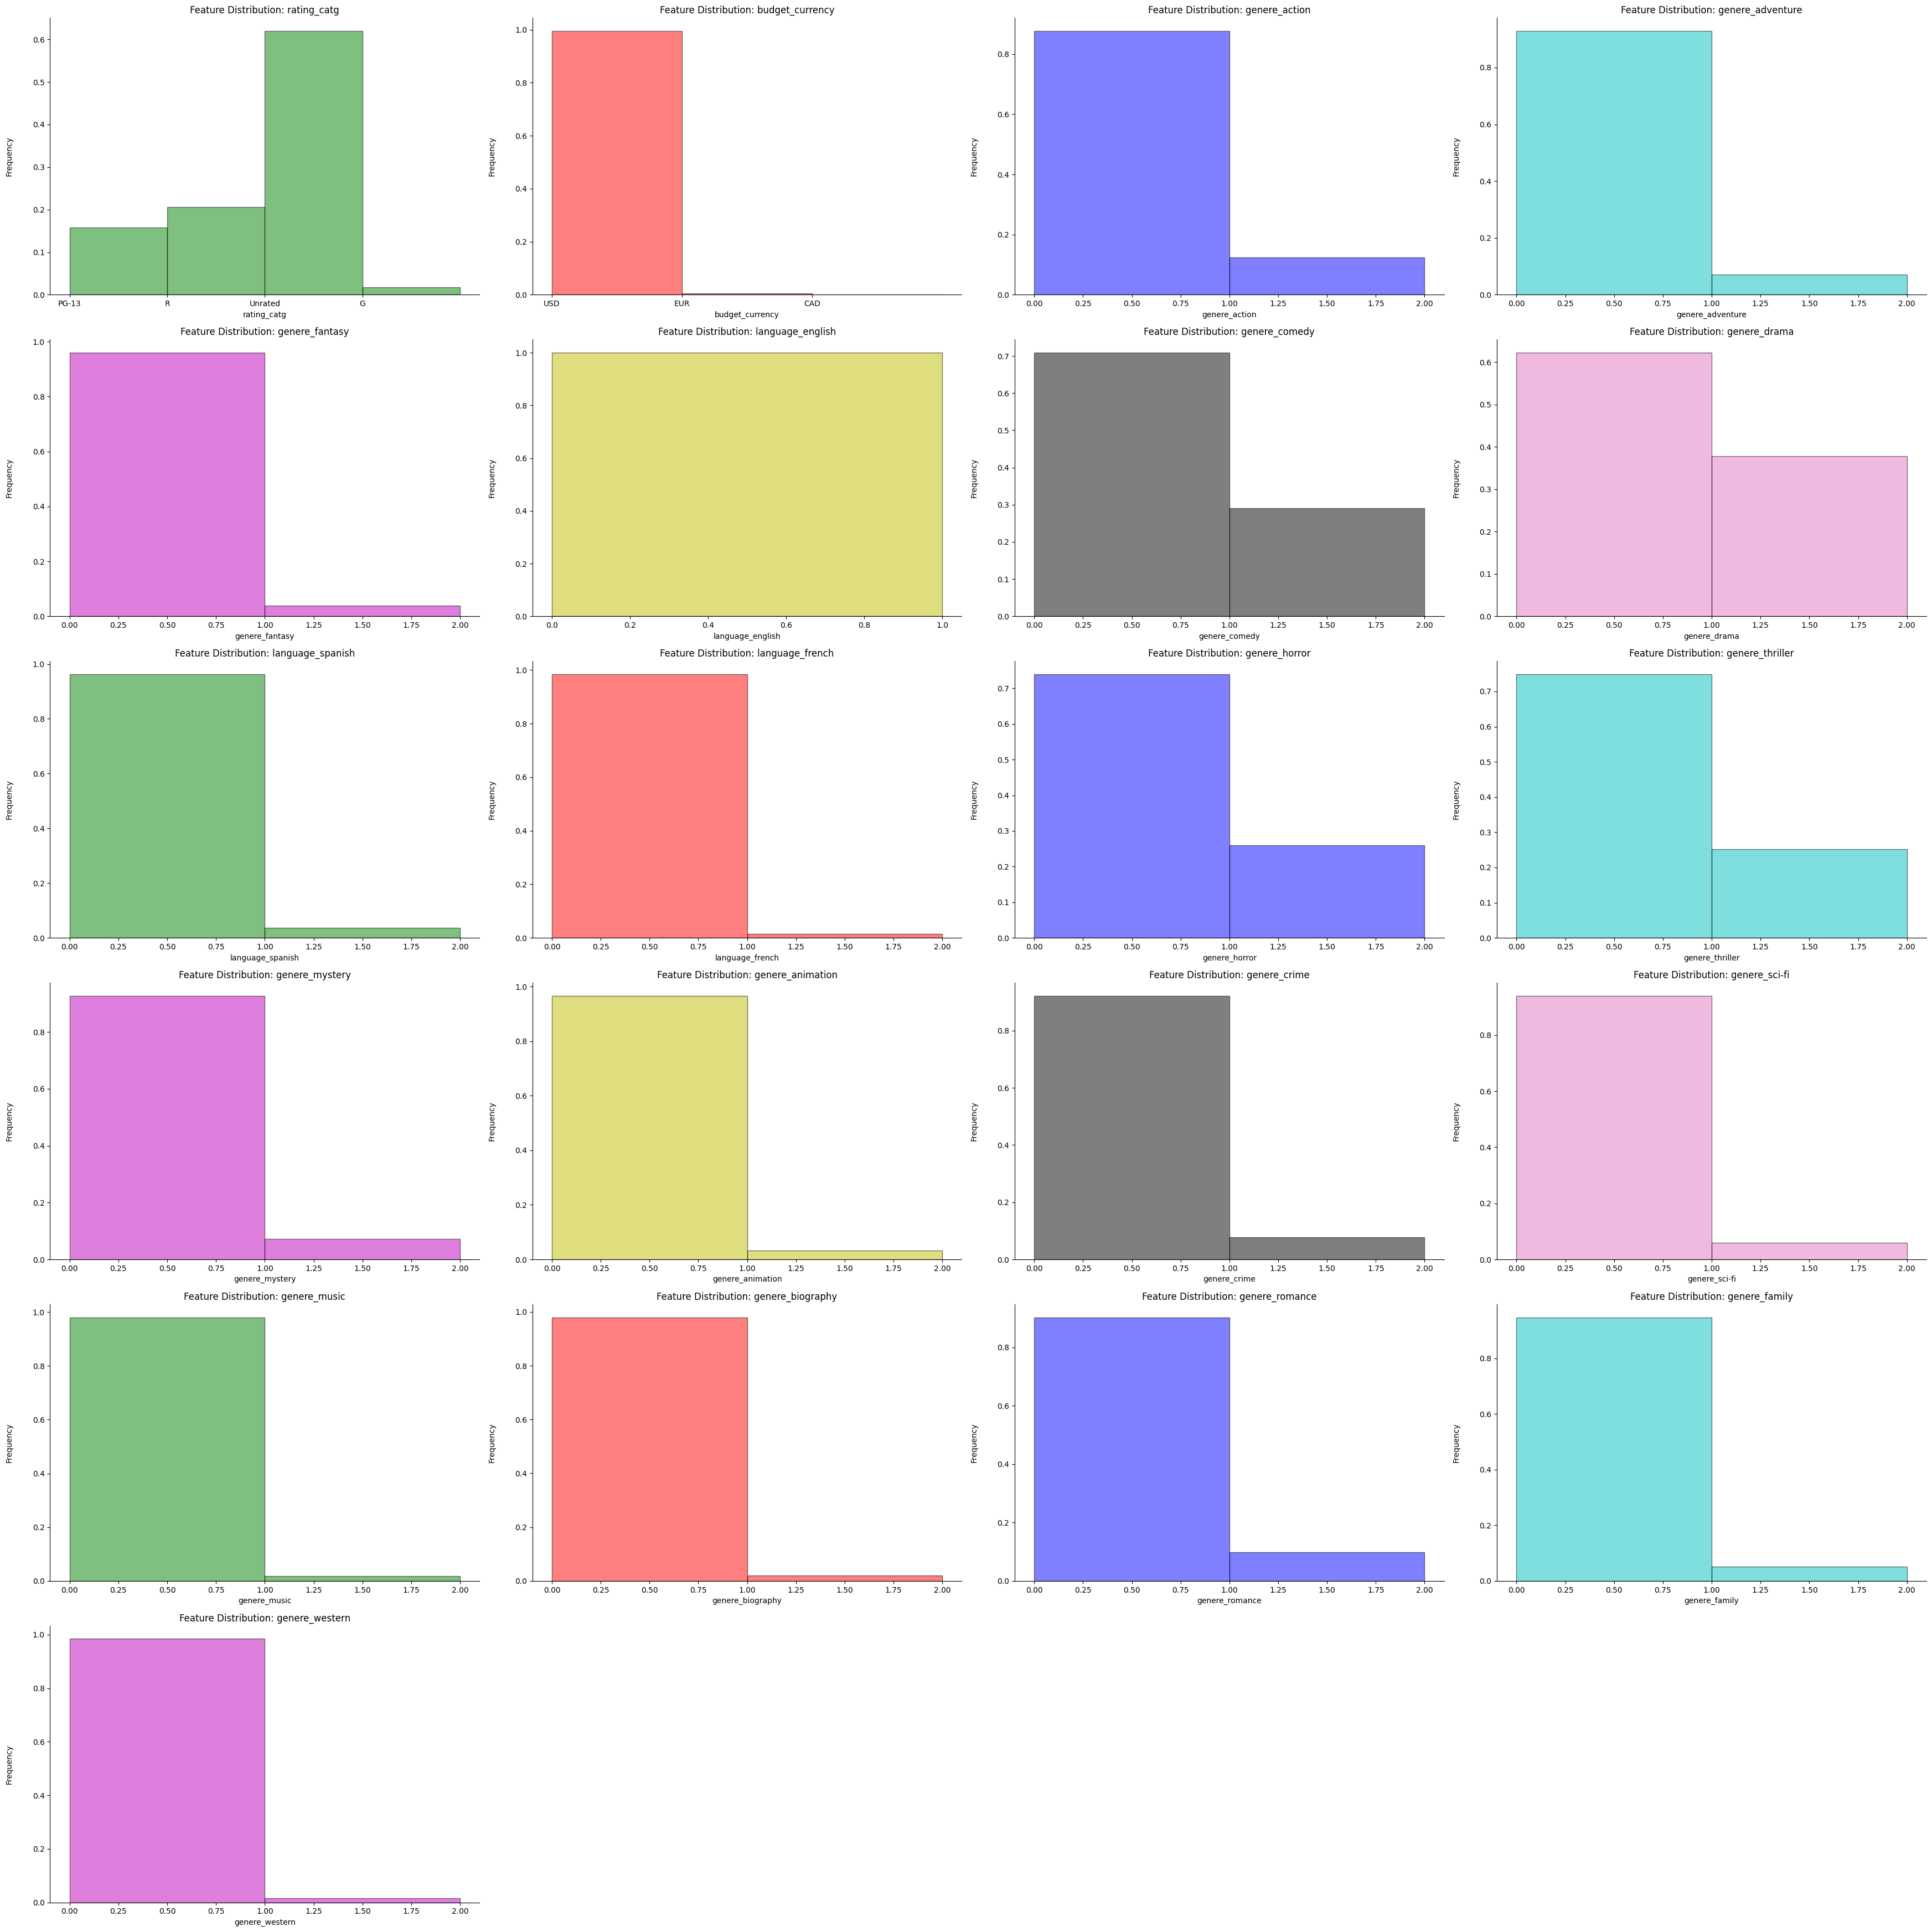

In [130]:
import math

cols_for_histogram = categorical_columns +binary_columns
feature_num = len(cols_for_histogram)

plot_per_row = 4
row_num = math.ceil(feature_num/plot_per_row)

fig = plt.gcf()
fig.set_size_inches(35,35)

c_list = ['g','r','b','c','m','y','k','tab:pink','g','r','b','c','m','y','k','tab:pink','g','r','b','c','m','y','k','tab:pink','g','r','b','c','m','y','k','tab:pink','g','r','b','c','m','y','k','tab:pink','g','r','b','c','m','y','k','tab:pink']


for i,col in enumerate(cols_for_histogram):
    col_vals = data[[col]]
    col_vals_series = data[col]
    unique_vals = len(col_vals_series.unique())
    
    bin_start = 0# min(col_vals.min())
    bin_end = unique_vals
    if col=="artist_gender":
        bin_start=0
        bin_end=3
    bins = np.linspace(bin_start, bin_end, unique_vals+1)
    
    
    ax = fig.add_subplot(row_num,plot_per_row,i+1)
    height, bins, patches = ax.hist(col_vals, bins, alpha=0.5, label=f"Feature {col}",density=True,edgecolor='k', color=c_list[i])
    #ax.legend(loc='upper left',fontsize=16)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency',rotation=90,labelpad=25)
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f'Feature Distribution: {col}')

plt.tight_layout()
plt.plot;

<br><b>Predictor Corralation</b><br>
We will observe the relationship between each predictor individually and attempt to see if any noteable correlation are spotted between the feature and whether or not the song is a hit.<br><br>

In the plot below, we can notice some interesting relationships:<br>
1. Dancability - If your song has less than ~0.2 dancability rate you will not become a hit.
2. Loudness - There is a correlation between loudness and success
3. Speechness - If your speech-to-music ration is higher than 0.45 it decreases your odds significantly at having a hit.
4. Duration - The longer your song lasts the fewer people will listen to it again.
5. Sections - The number of sections the particular track has appear to have an effect on its success rate.

In [137]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


In [132]:
color_map = []
for val in X[pred_metascore]:
    if val==1:
        color_map.append('g')
    else:
        color_map.append('r')

In [133]:
y_metascore = X['pred_metascore']

<ipython-input-138-06c2879a70f3>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlGn')


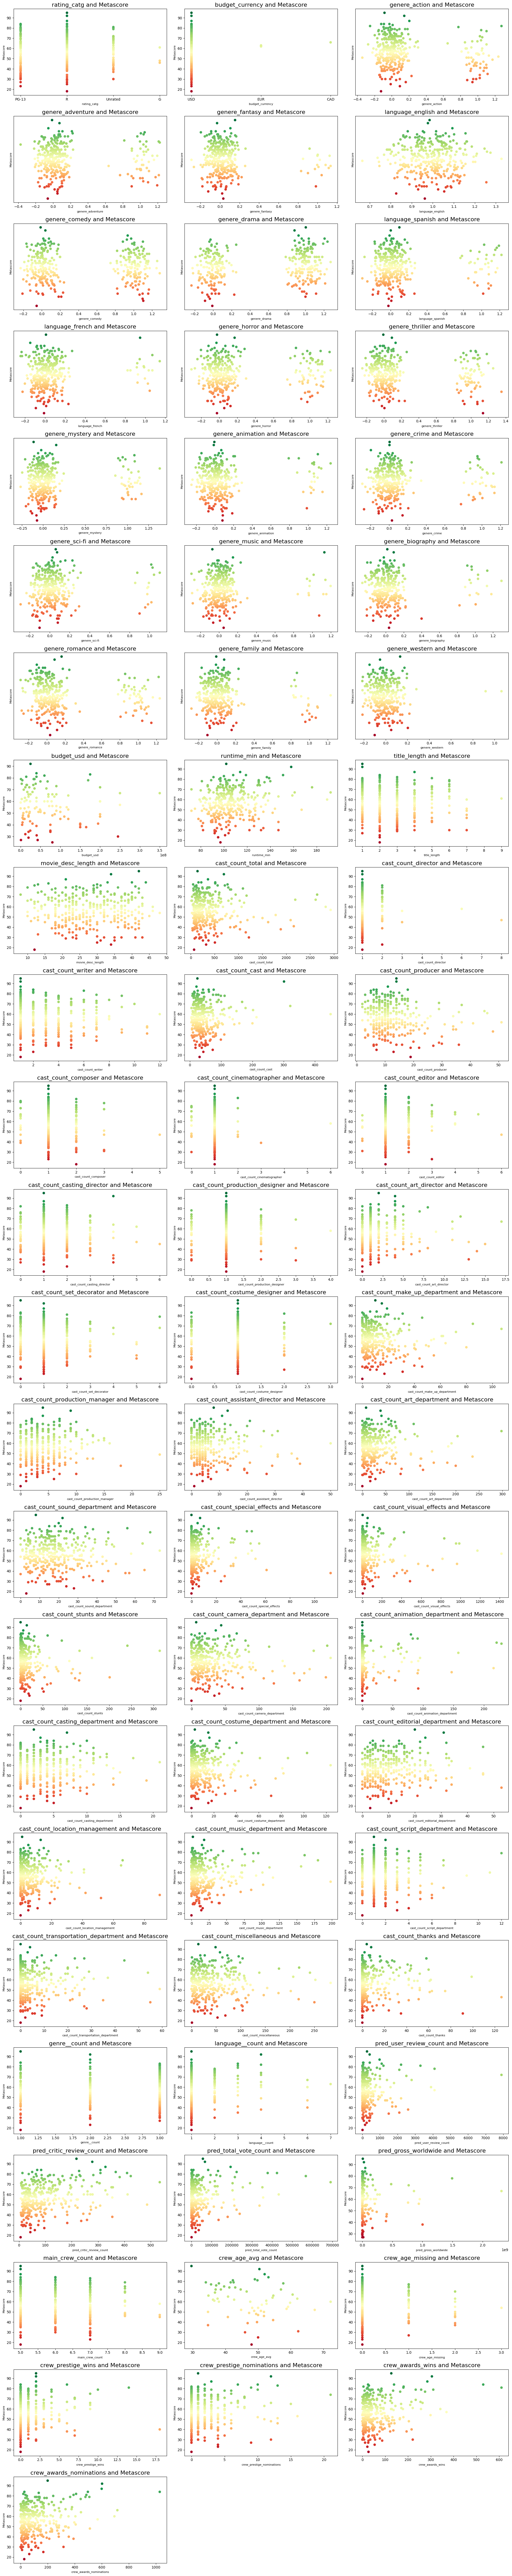

In [138]:

coeff_num = len(predictor_columns)
plot_col_num = 3
row_num = math.ceil(coeff_num/plot_col_num)

fig = plt.gcf()
fig.set_size_inches(20,100)

for i,pred_col in enumerate(predictor_columns):
    
    sigma = 0.1
    
    mu =0.001
    
    # generate normally distributed samples
    y_noise = sigma * np.random.randn(X.shape[0]) + mu
    
    ax = fig.add_subplot(row_num,plot_col_num,i+1)
    x_val = X[pred_col]
    if pred_col in binary_columns:
        x_noise = sigma * np.random.randn(X.shape[0]) + mu
        x_val = X[pred_col]+x_noise
        ax.set_yticks((0,1), labels=('No', 'Yes'))
        
    if pred_col in categorical_columns:
        x_noise = sigma * np.random.randn(X.shape[0]) + mu
        x_val = X[pred_col]
    
    cmap = cm.get_cmap('RdYlGn')

    ax.scatter(x_val,y_metascore, cmap=cmap, c=y_metascore)
    ax.set_xlabel(f'{pred_col}', fontsize=8)
    ax.set_ylabel(f'Metascore', fontsize=8)
    #ax.set_xlabel('Hit', fontsize=8)
    #ax.set_xticks((0,1), labels=('No', 'Yes'), fontsize=14)
    ax = plt.gca()
    ax.set_title(f'{pred_col} and Metascore').set_size(16)

    
plt.tight_layout()
plt.plot;